In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List, Optional, Union
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from plots import ForexPlotter

from data_handle import (
    ForexDataClean,
    ForexDataLoad,
    ForexPctChange,
    ForexQuickLook,
)

from features import (
    ForexTSIndicators,
    ForexCustomIndicators,
    ForexMomentumIndicators,
    ForexTrendIndicators,
    ForexVolatilityIndicators,
    ForexVolumeIndicators,
    ForexMASignals,
    ForexMACDSignals,
    ForexADXSignals,
    ForexParabolicSARSignals,
)

import warnings
warnings.filterwarnings('ignore')


data = ForexDataLoad(file_path = '../data/xauaud.csv').data
ohlcv_data = ForexDataLoad(file_path = '../data/xauaud.csv').data

cleaner = ForexDataClean(data = data, fast_clean = True)
data = cleaner.data

FOREX DATA LOADER
 Available Fuctions 
1 load_csv 
2 load_dataframe 
3 load_from_database
Data loaded successfully!
Shape: (38217, 5)

FOREX DATA LOADER
 Available Fuctions 
1 load_csv 
2 load_dataframe 
3 load_from_database
Data loaded successfully!
Shape: (38217, 5)

FOREX DATA CLEANER
 Available Fuctions 
1 remove_duplicates 
2 handle_missing_values 
3 validate_ohlc_integrity 
4 handle_outliers
Keep = first and subset = None
Removed 0 duplicate entries
Found 1 missing values
 dropped: 1 missing values .
OUTLIER DETECTION AND HANDLING
Method: quantile, Strategy: cap, Threshold: 3.0
Remove outliers: False
--------------------------------------------------
open: Found 766 outliers (383 low, 383 high)
Bounds: [1817.81300 - 5218.90300]
Original range: [1674.10000 - 5476.98000]
Method: Quantile (1%-99%)
Outliers detected but not removed (remove=False)

high: Found 764 outliers (381 low, 383 high)
Bounds: [1819.15000 - 5224.87300]
Original range: [1676.91000 - 5483.78000]
Method: Quantile 

In [2]:
trend_data = ForexTrendIndicators(data = data).generate_all_trend_indicators(
    macd = [[12,26,9], [6,13,4], [24,36,8], [7,19,4]], 
    adx_periods = [ 7, 14, 21, 28],
    parabolic_sar = [[0.02, 0.2], [0.04, 0.4], [0.06, 0.6], [0.01, 0.01]]
)

TREND INDICATORS
 Available Fuctions: 
1 add_sma 
2 add_ema 
3 add_macd 
4 add_adx 
5 add_parabolic_sar 
6 generate_all_trend_indicators
Data Info
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38216 entries, 2017-04-24 02:00:00 to 2025-09-05 20:00:00
Data columns (total 71 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   close                          38216 non-null  float64
 1   sma_10                         38207 non-null  float64
 2   sma_10_slope                   38206 non-null  float64
 3   sma_20                         38197 non-null  float64
 4   sma_20_slope                   38196 non-null  float64
 5   sma_50                         38167 non-null  float64
 6   sma_50_slope                   38166 non-null  float64
 7   sma_100                        38117 non-null  float64
 8   sma_100_slope                  38116 non-null  float64
 9   sma_200                        38017 non-nul

In [3]:
macd_signals = ForexMACDSignals(
    data = trend_data[0],
    parameters = trend_data[1]['macd_params']
)

MACD SIGNAL GENERATION
 Available Fuctions: 
1 macd_crossover_signals 
2 macd_histogram_signals 
3 macd_zero_line_signals 
4 generate_all_macd_signals


In [4]:
trend_data[1]['macd_params']

[[12, 26, 9], [6, 13, 4], [24, 36, 8], [7, 19, 4]]

In [5]:
trend_signals_data = macd_signals.generate_all_macd_signals()

Data Info
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38216 entries, 2017-04-24 02:00:00 to 2025-09-05 20:00:00
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   close                                    38216 non-null  float64
 1   macd_12_26_macd_signal_9_crossover       38216 non-null  int64  
 2   macd_12_26_macd_signal_4_crossover       38216 non-null  int64  
 3   macd_12_26_macd_signal_8_crossover       38216 non-null  int64  
 4   macd_6_13_macd_signal_9_crossover        38216 non-null  int64  
 5   macd_6_13_macd_signal_4_crossover        38216 non-null  int64  
 6   macd_6_13_macd_signal_8_crossover        38216 non-null  int64  
 7   macd_24_36_macd_signal_9_crossover       38216 non-null  int64  
 8   macd_24_36_macd_signal_4_crossover       38216 non-null  int64  
 9   macd_24_36_macd_signal_8_crossover       38216 non-null  int64  
 10  m

In [6]:
signals1 = trend_signals_data.filter(regex = 'crossover|close').columns
signals2 = trend_signals_data.filter(regex = 'direction|close').columns
signals3 = trend_signals_data.filter(regex = 'momentum|close').columns
signals4 = trend_signals_data.filter(regex = 'zero_cross|close').columns
signals5 = trend_signals_data.filter(regex = 'histogram|close').columns
signal_cols = [signals1, signals2, signals3, signals4, signals5]

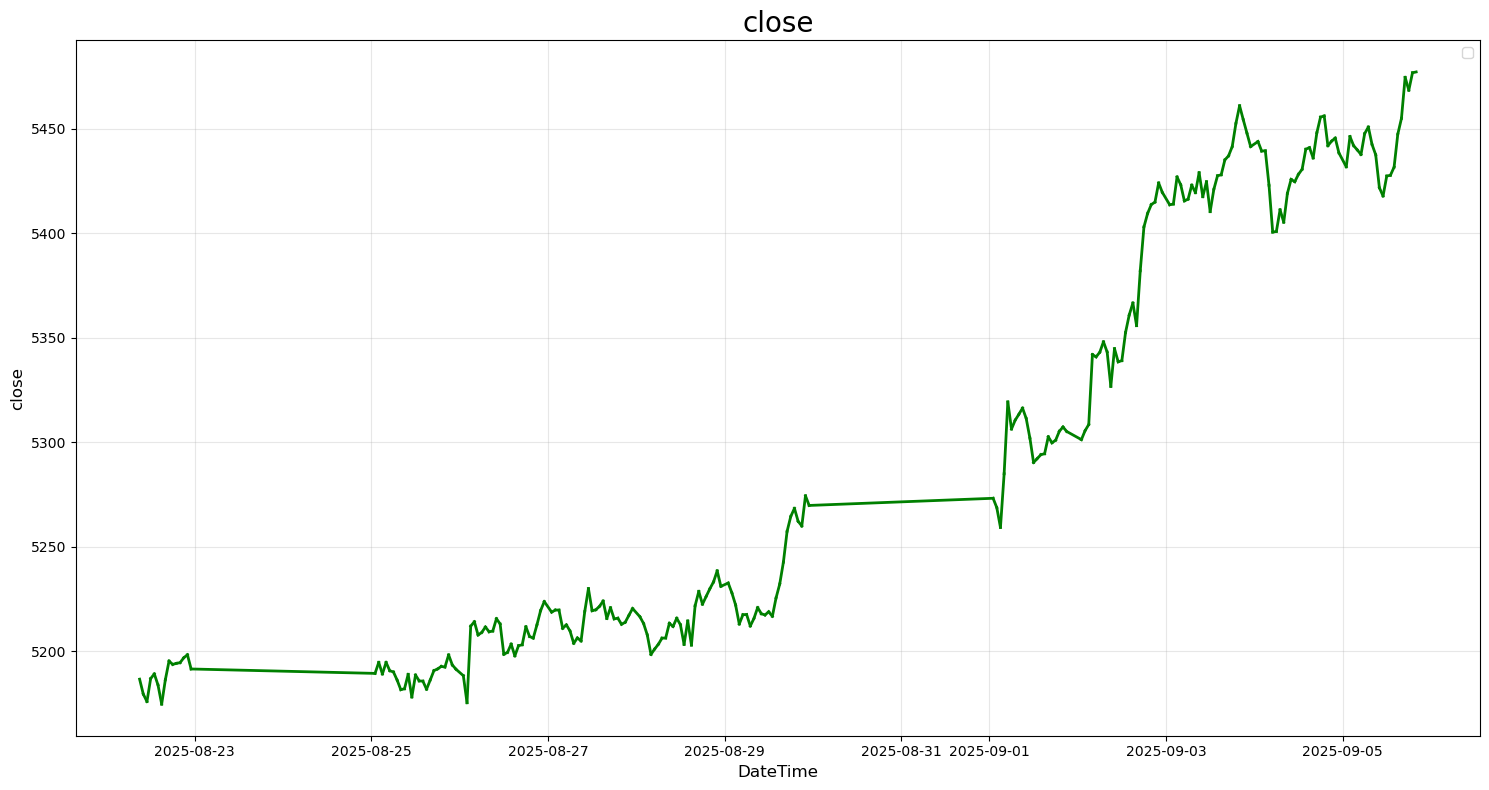

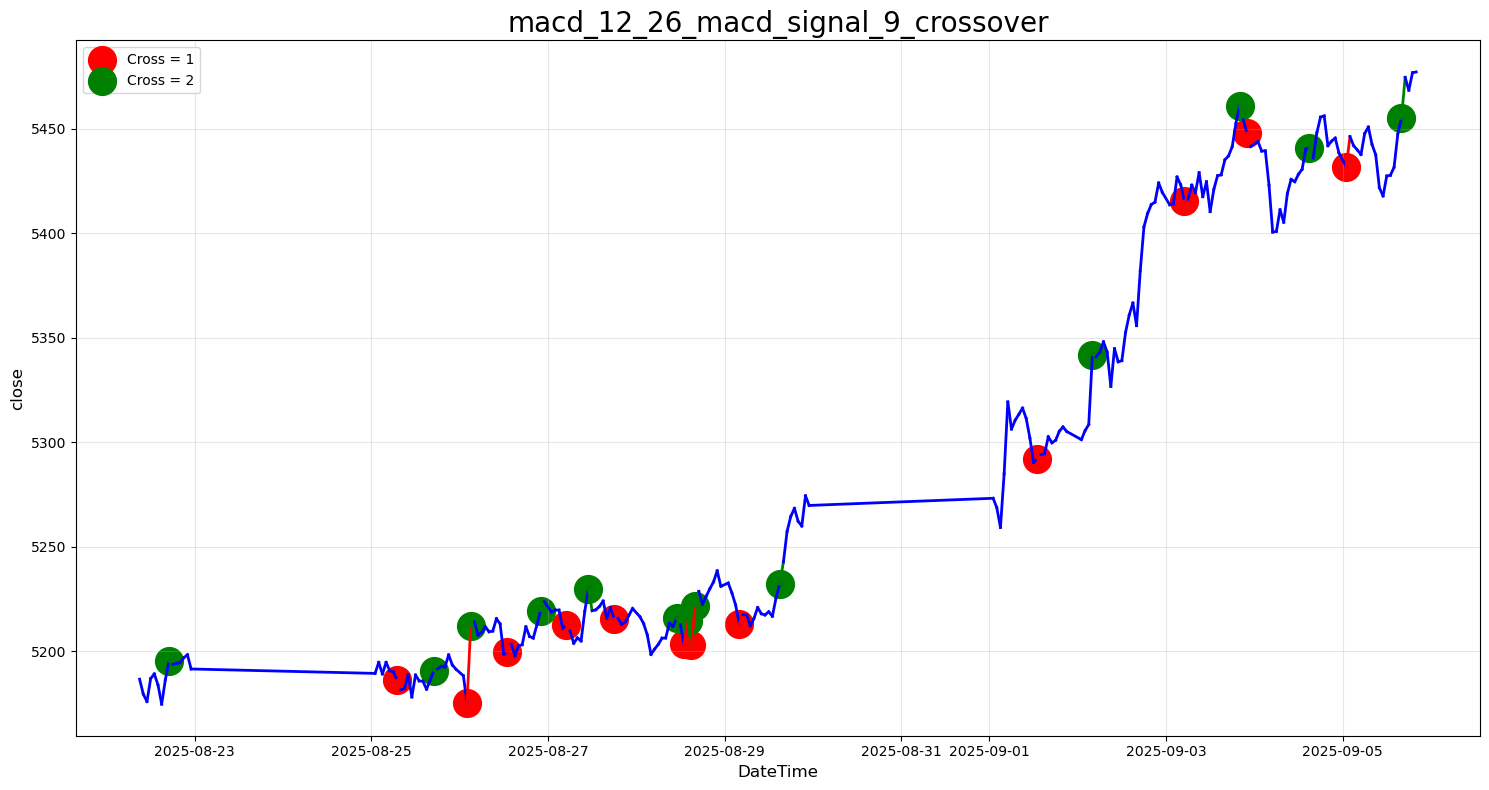

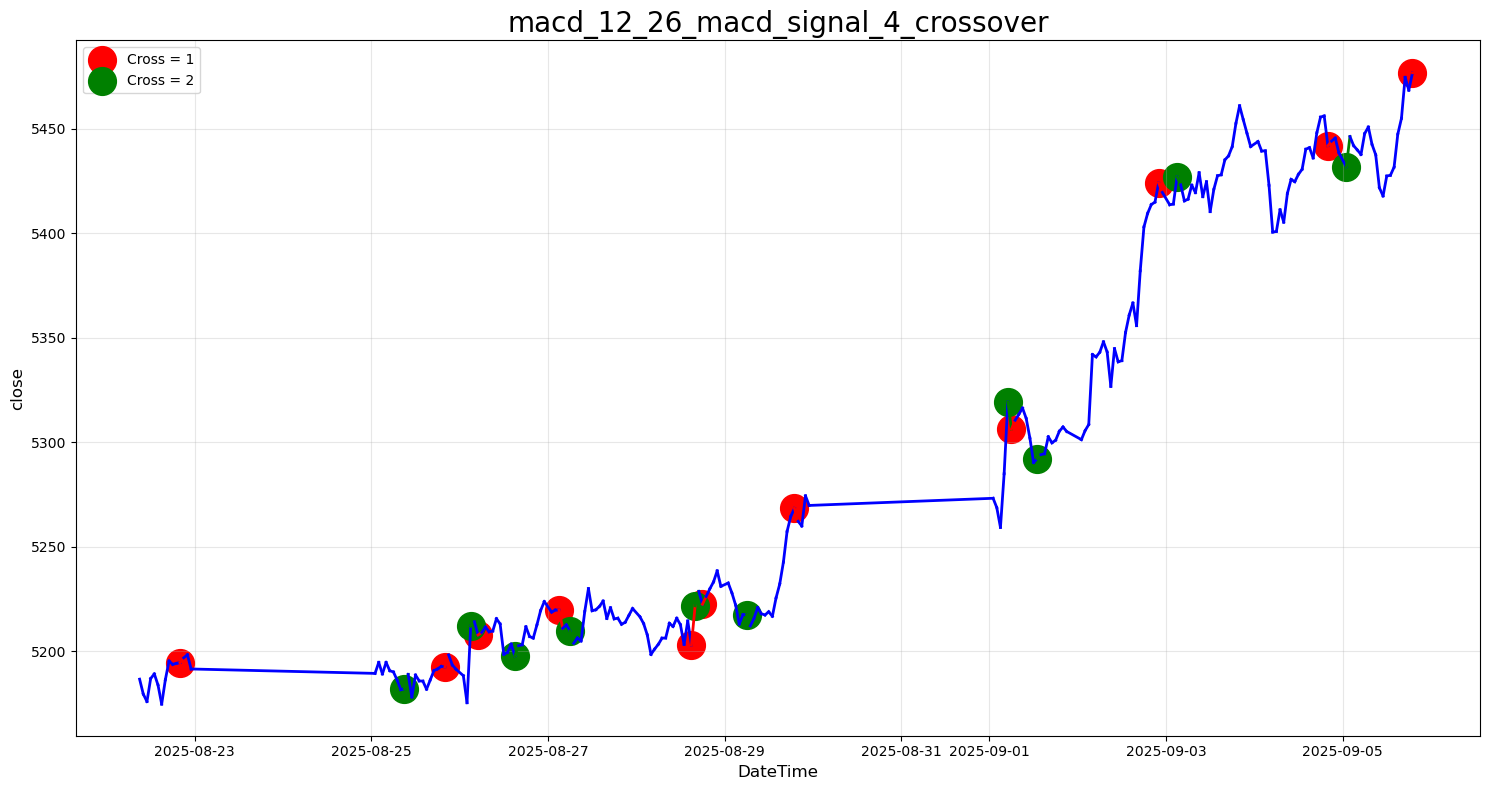

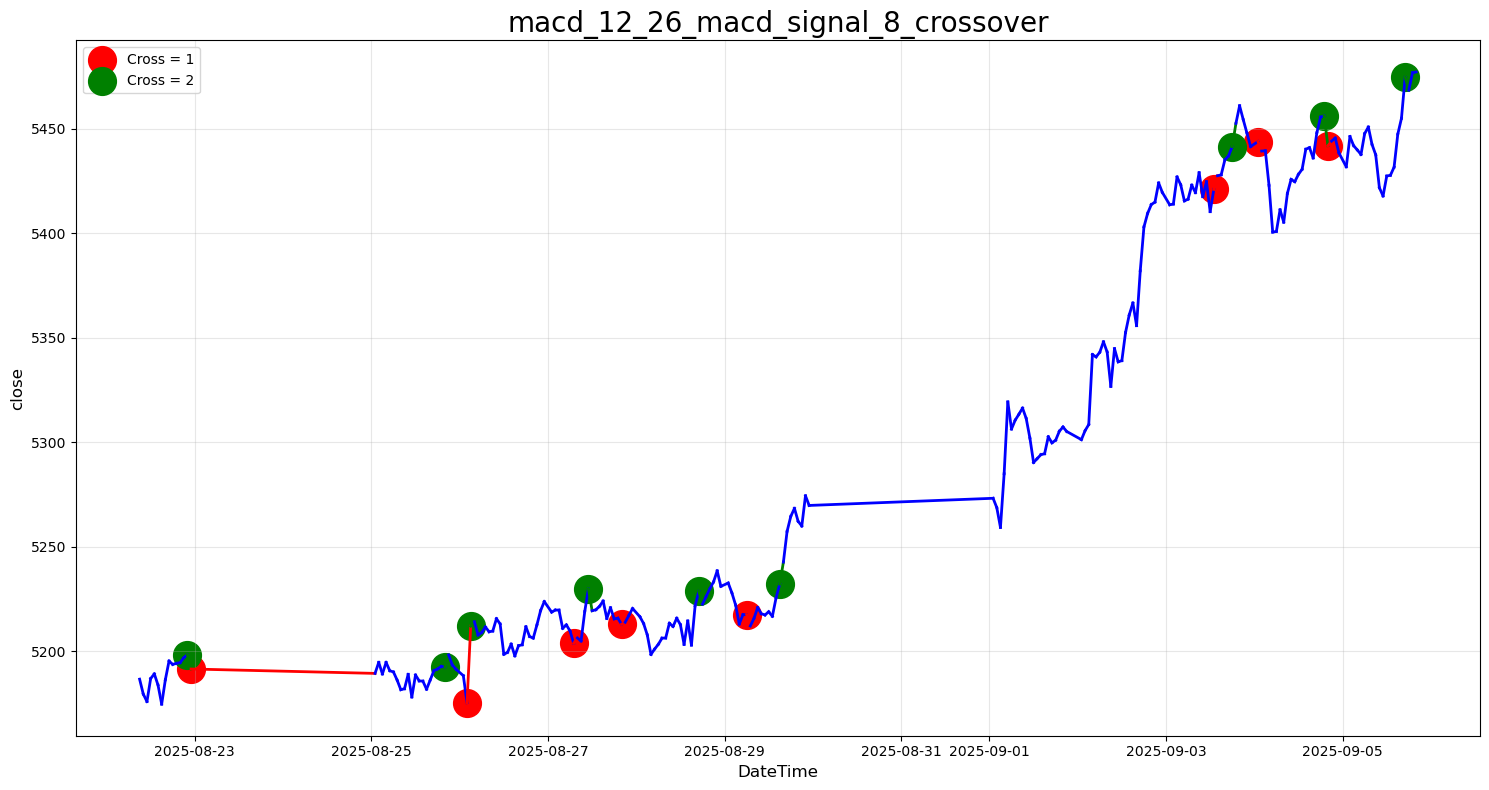

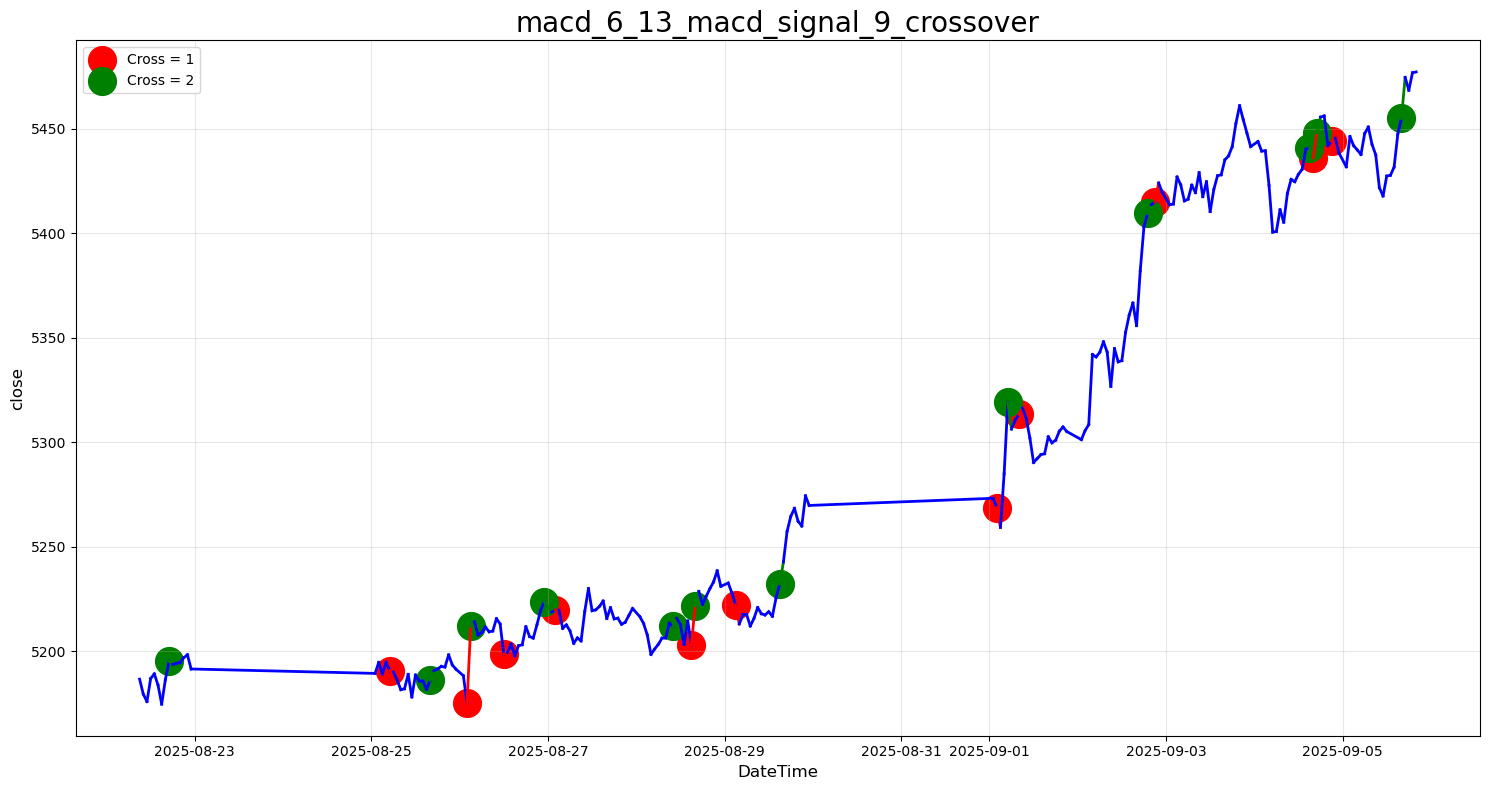

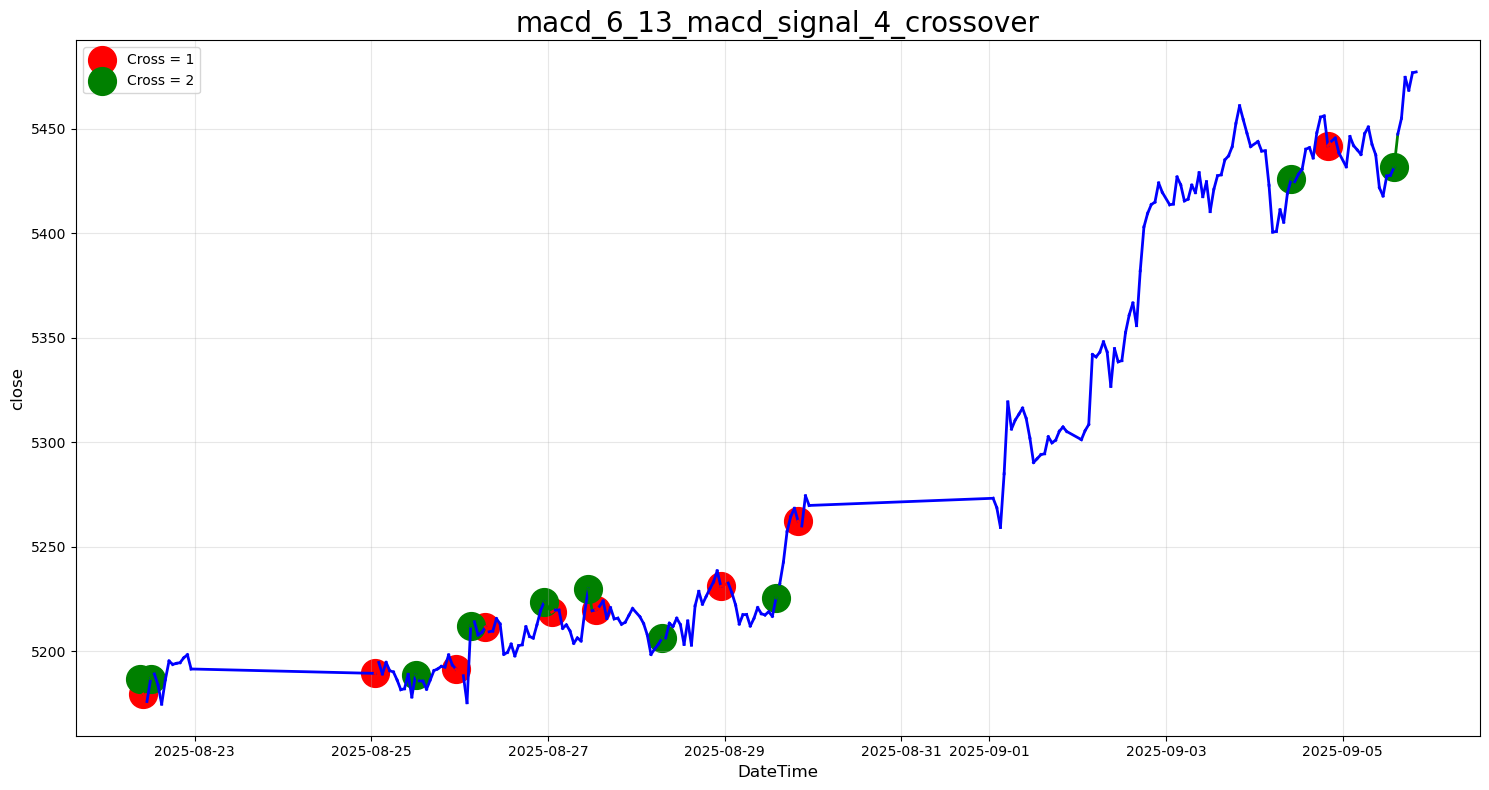

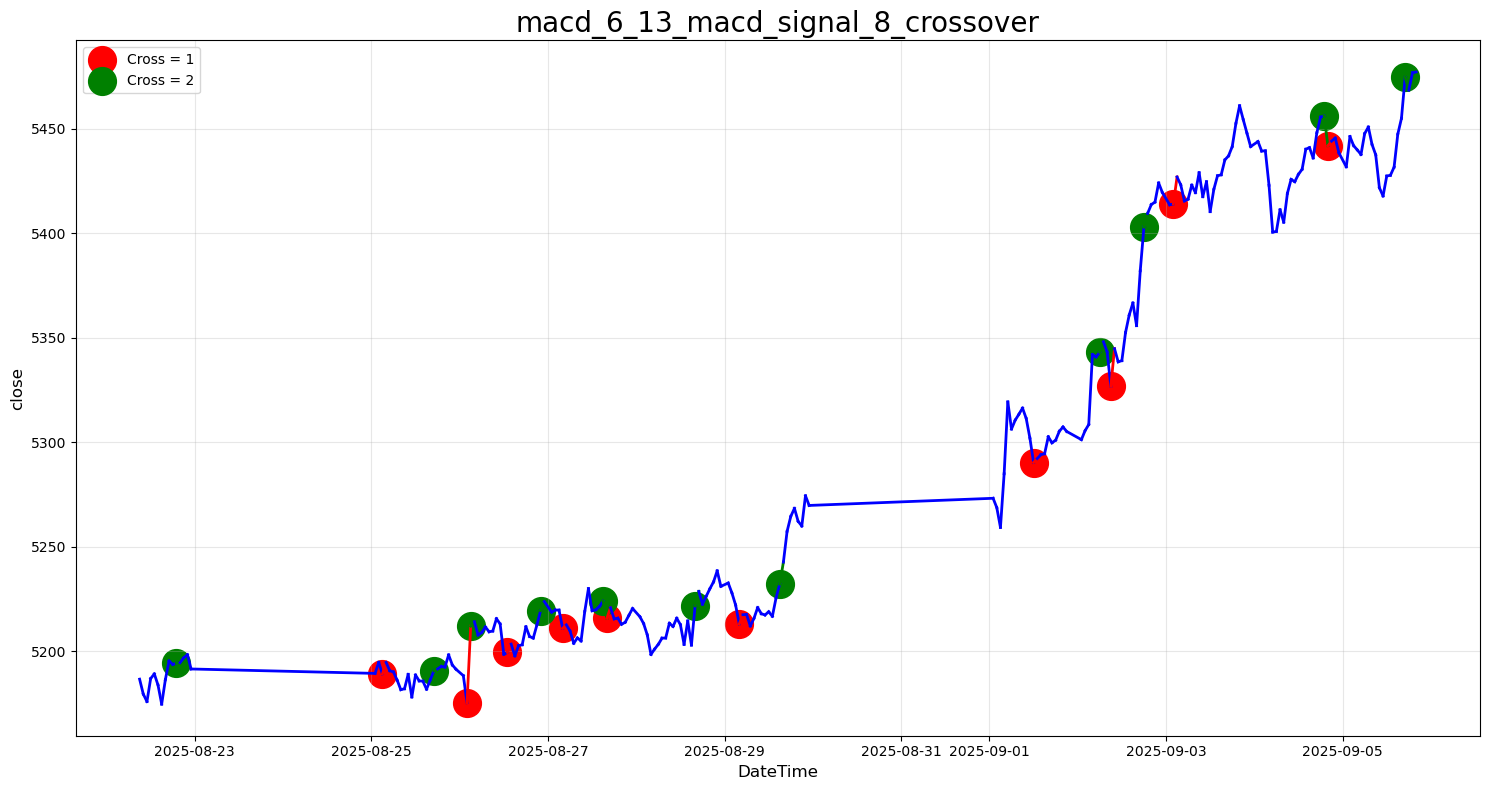

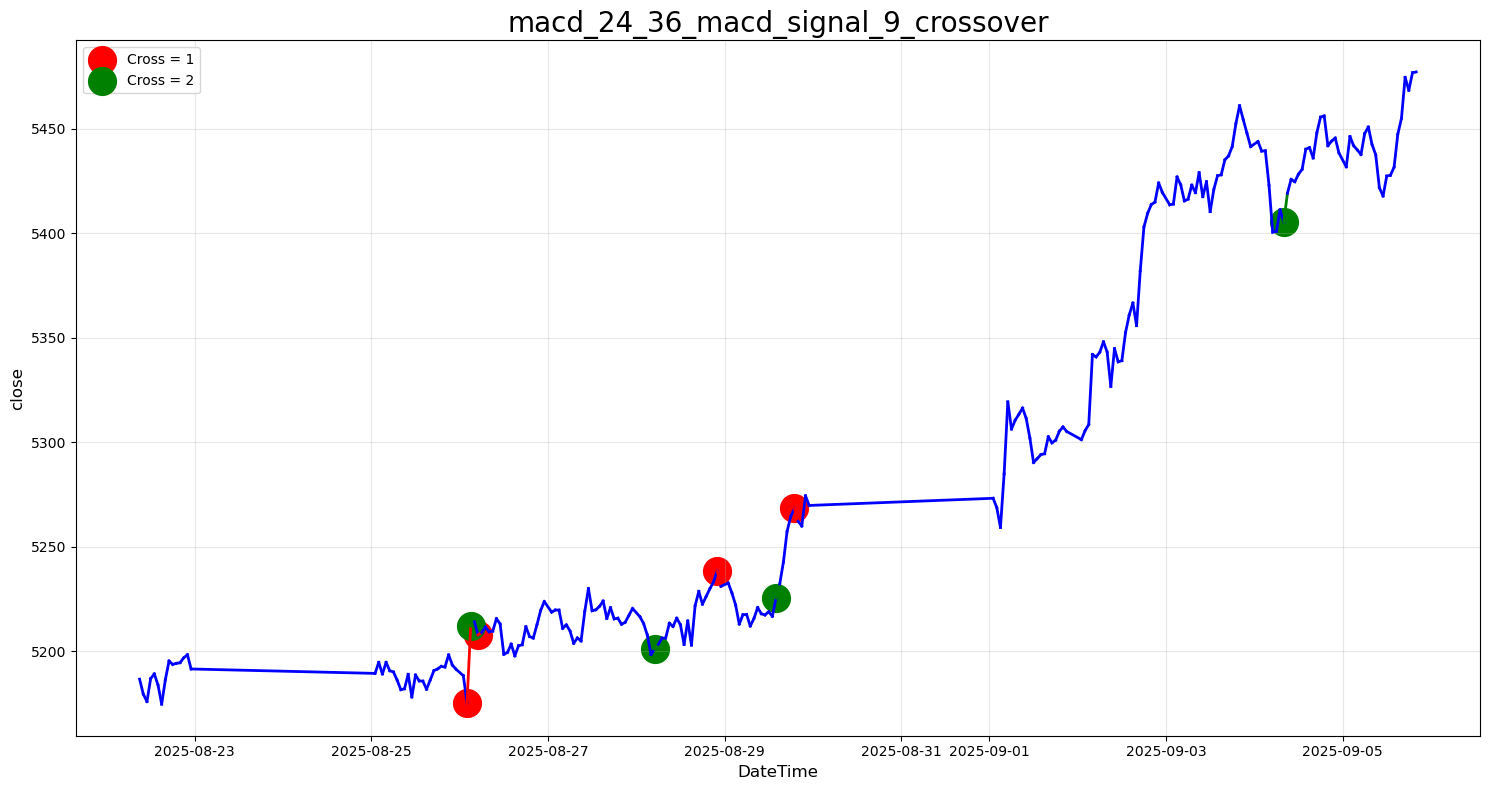

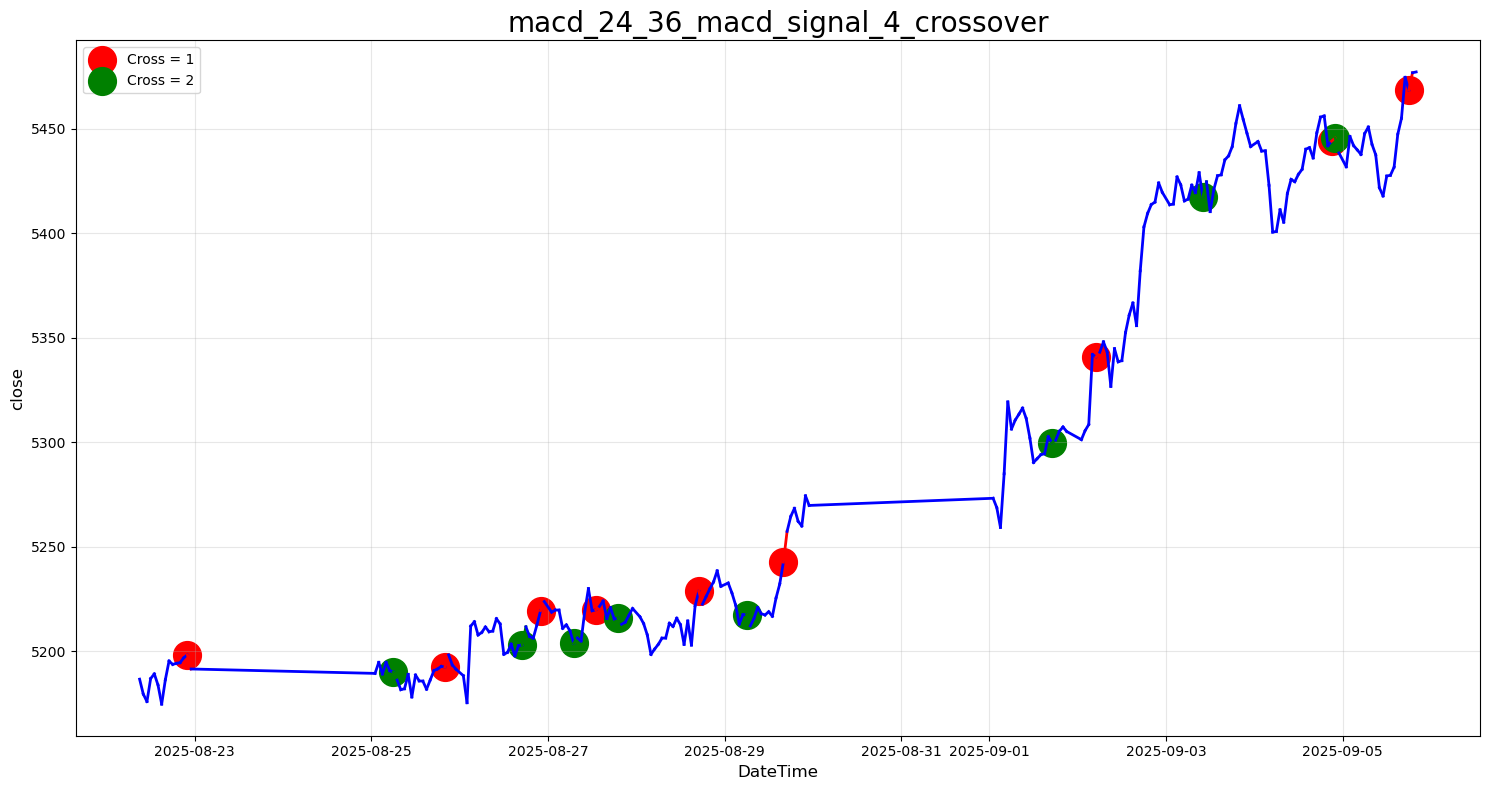

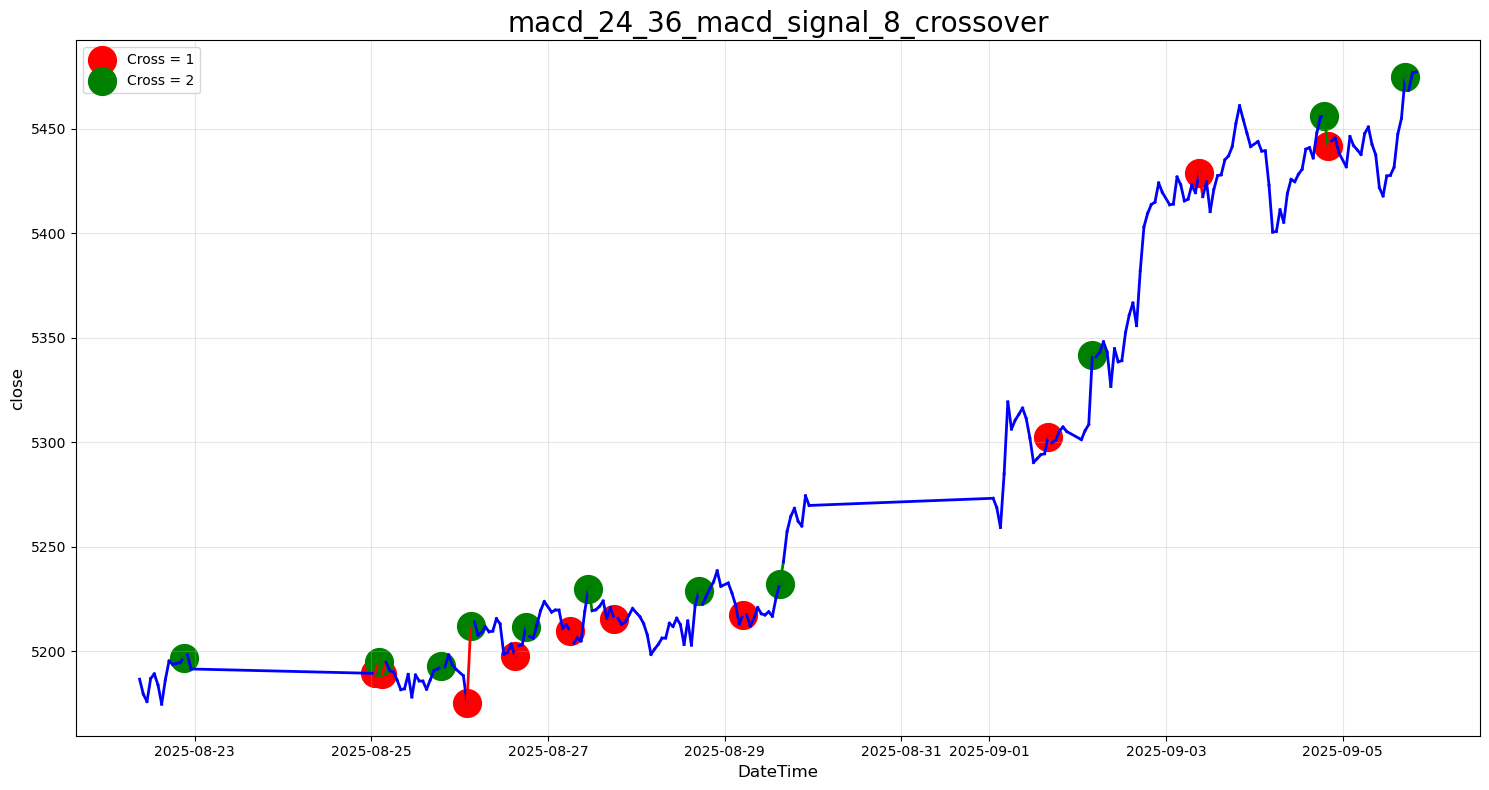

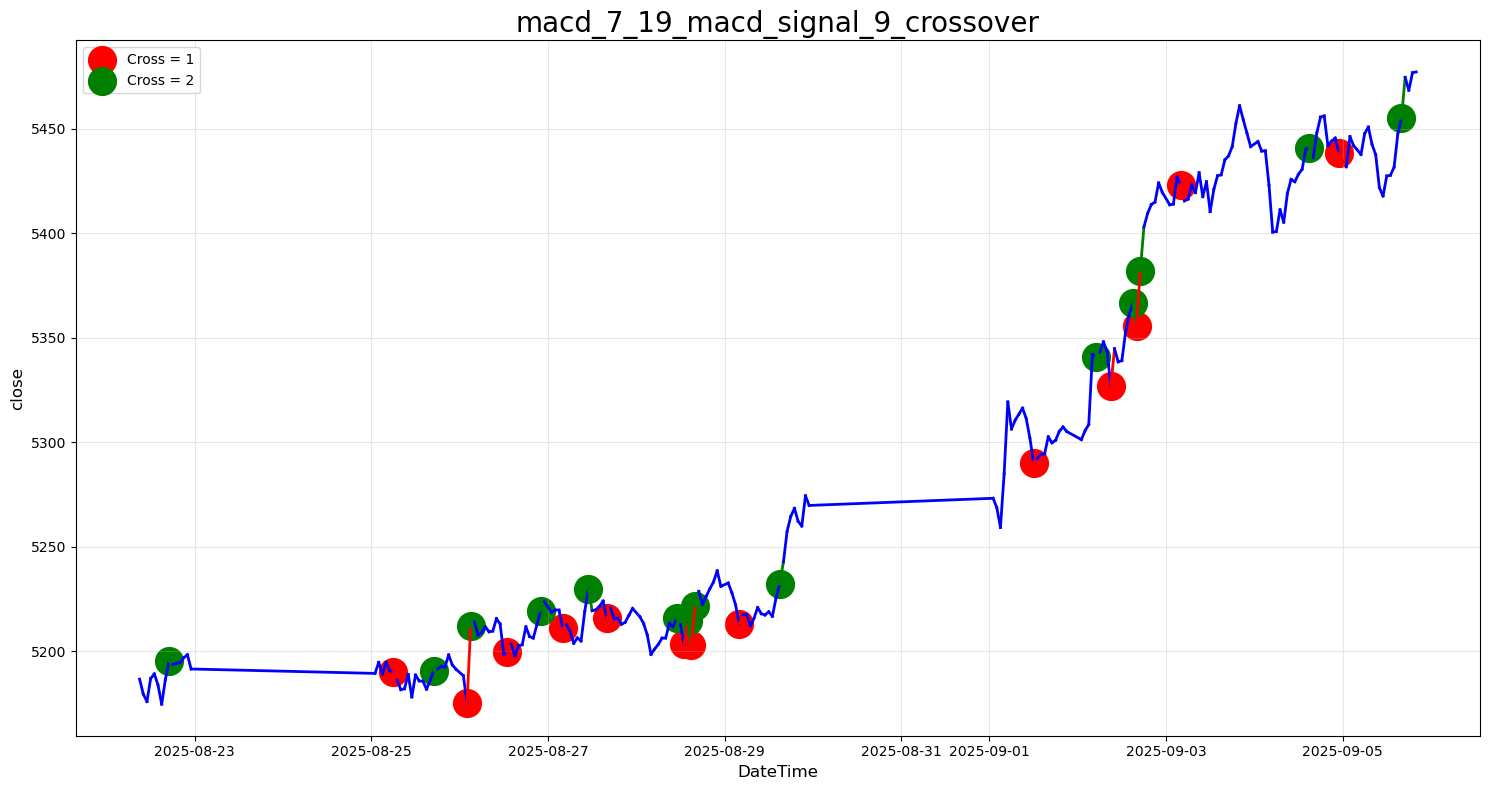

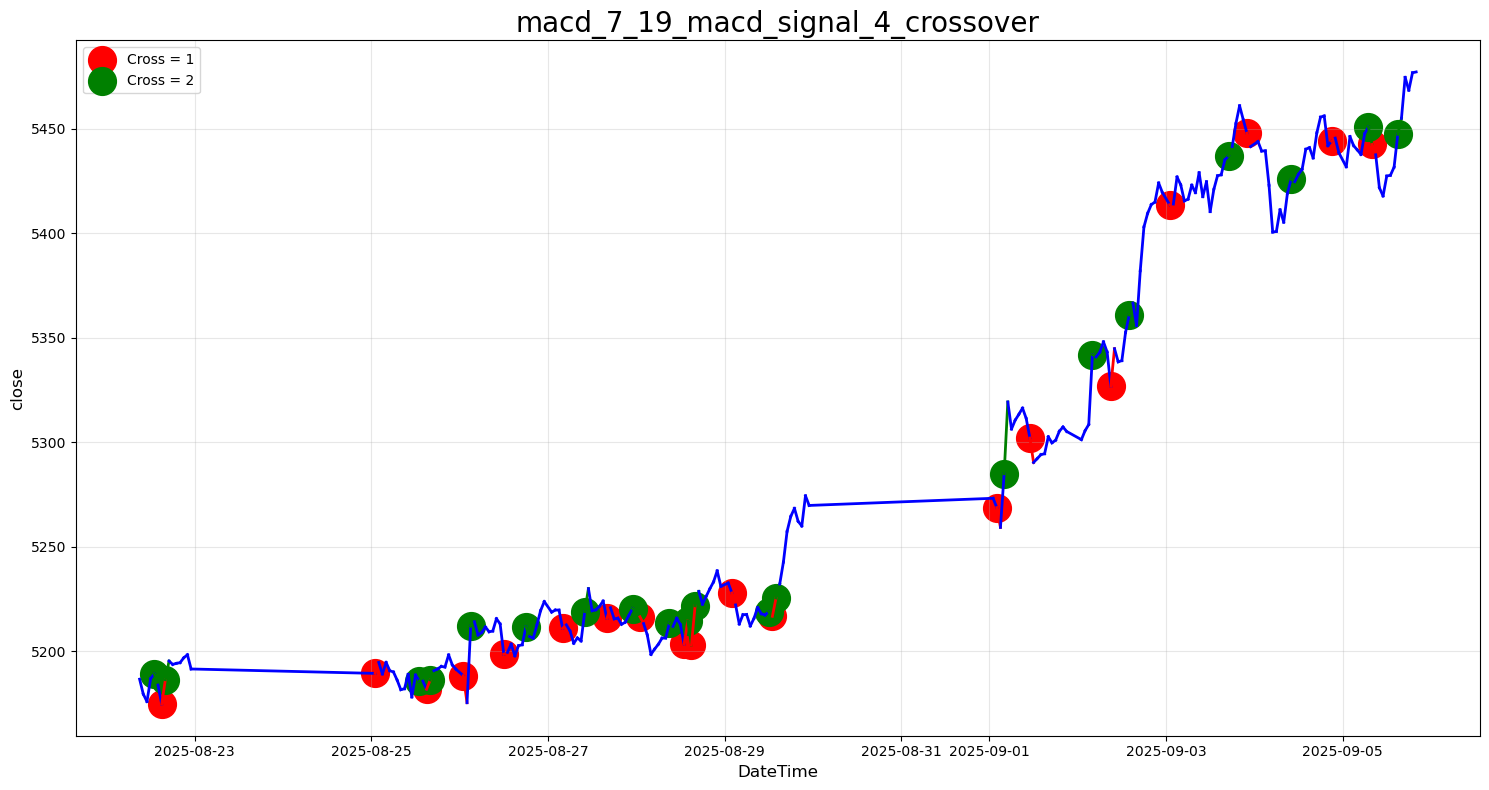

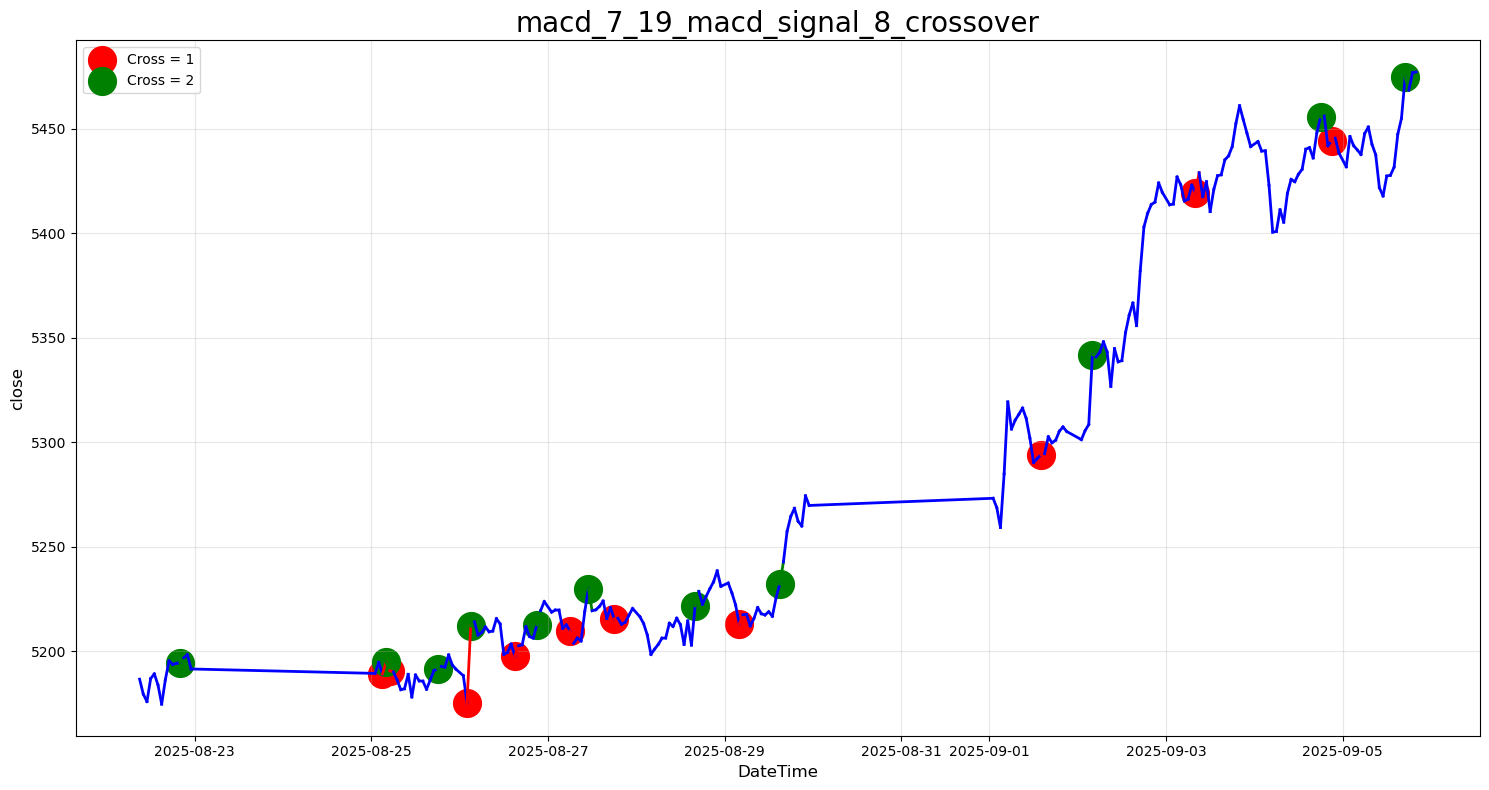

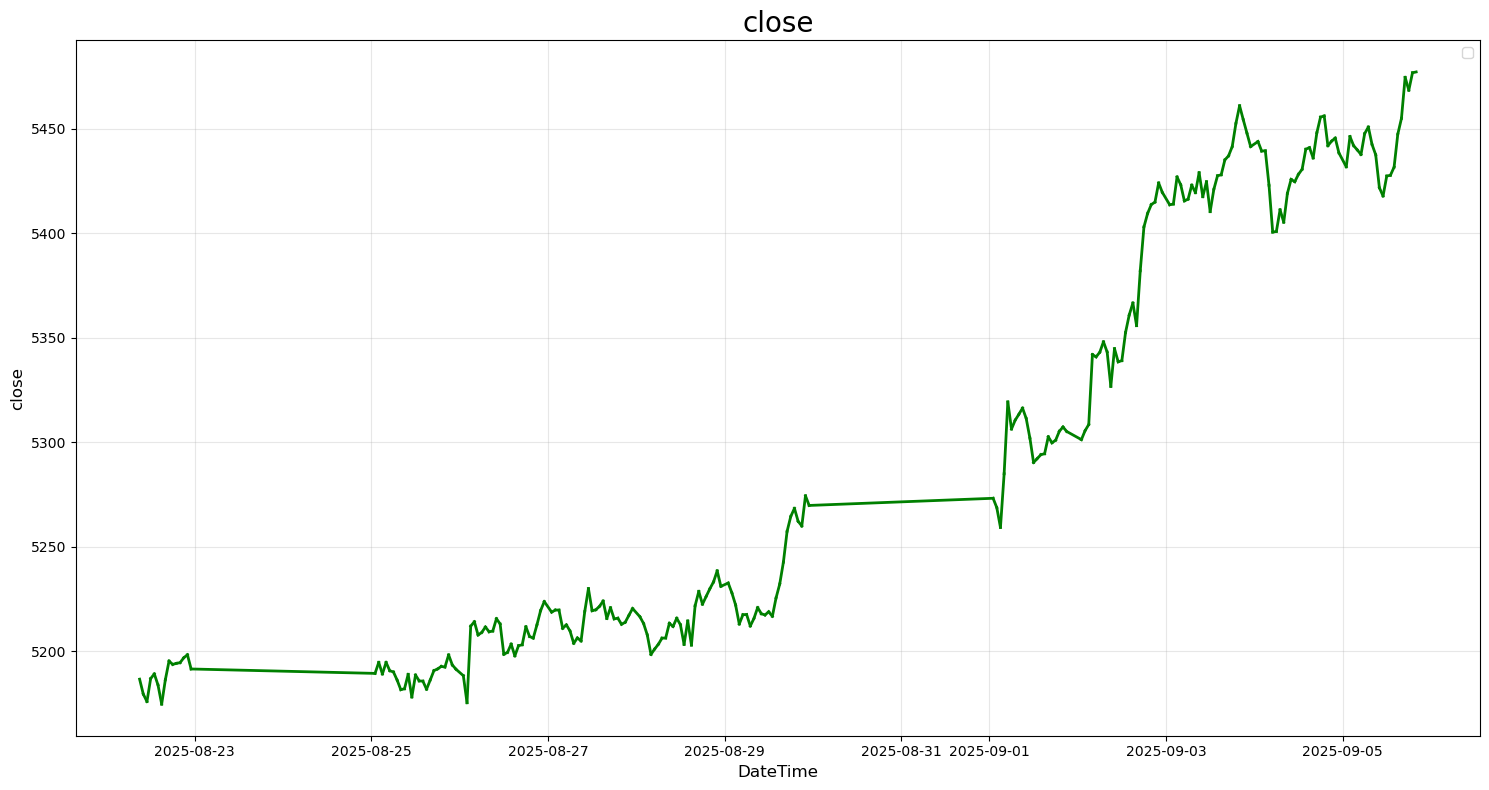

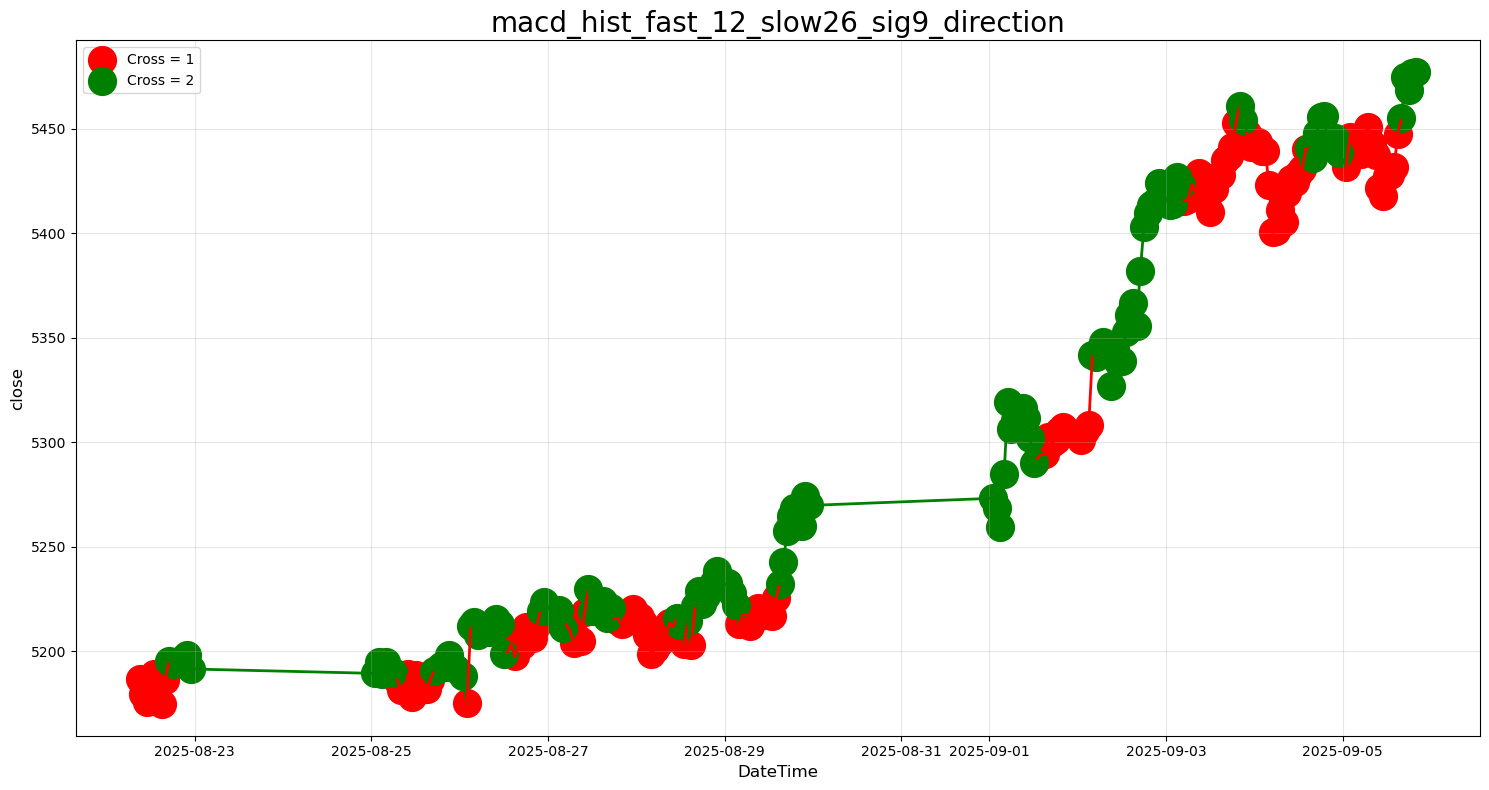

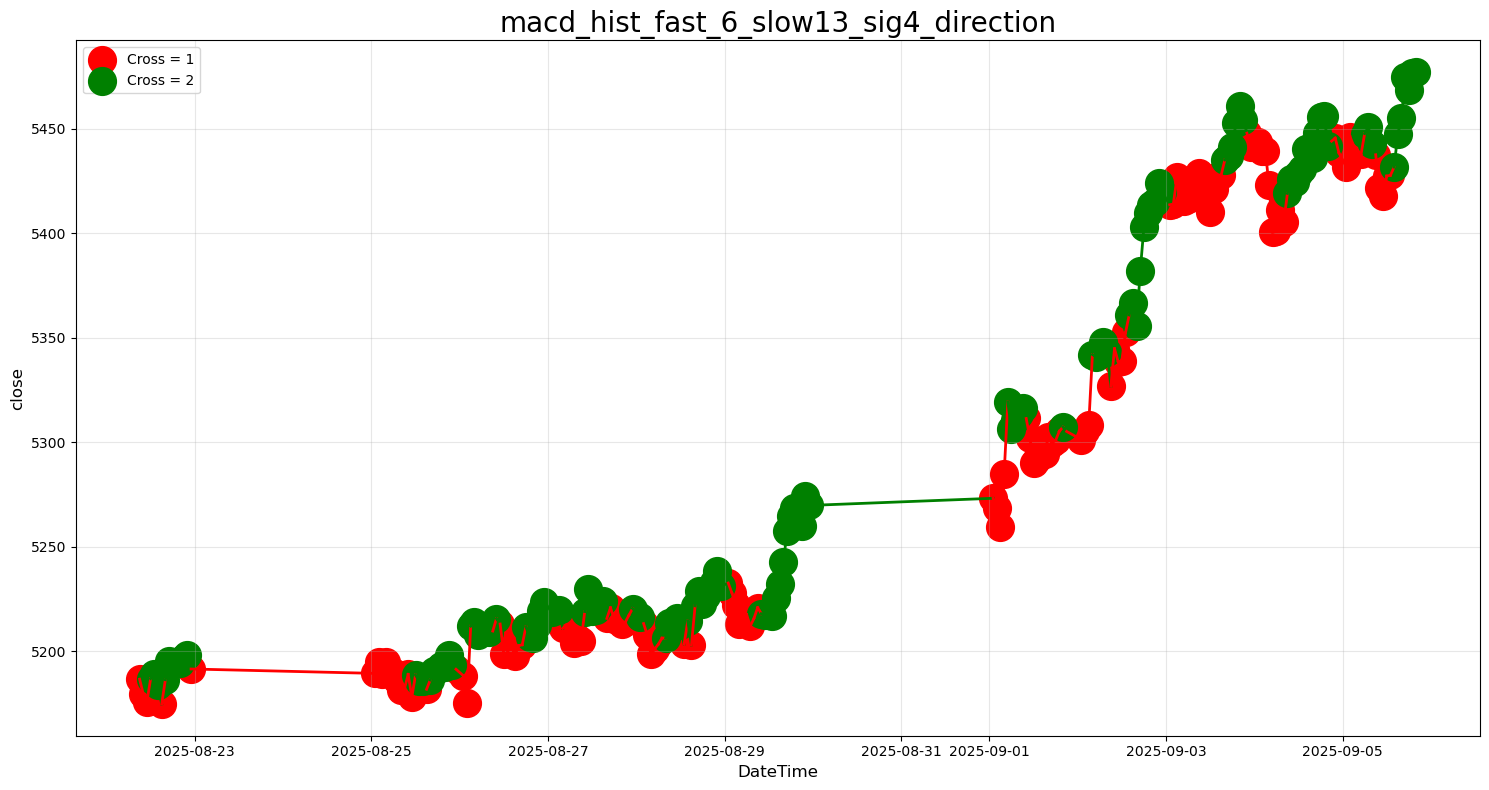

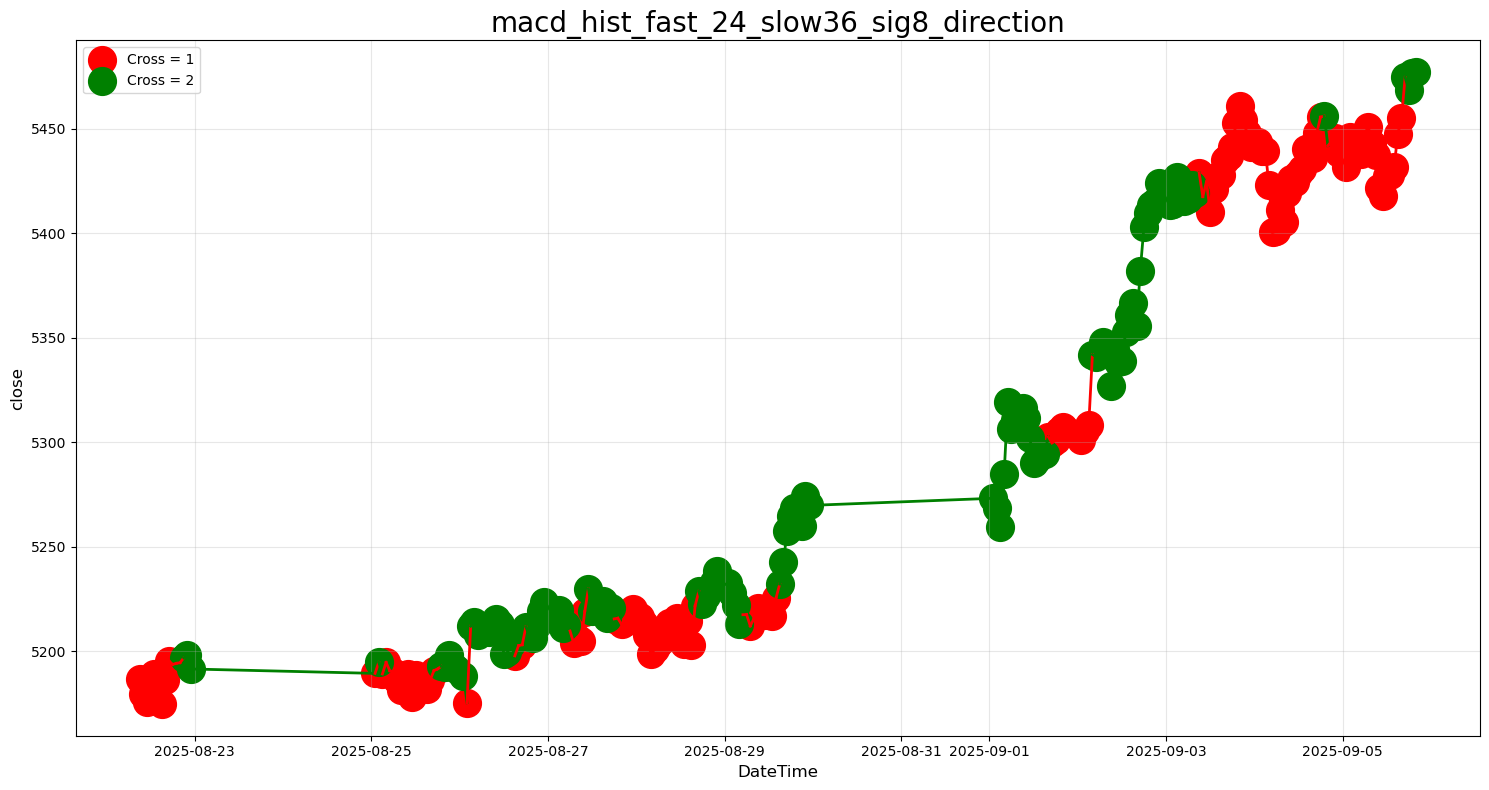

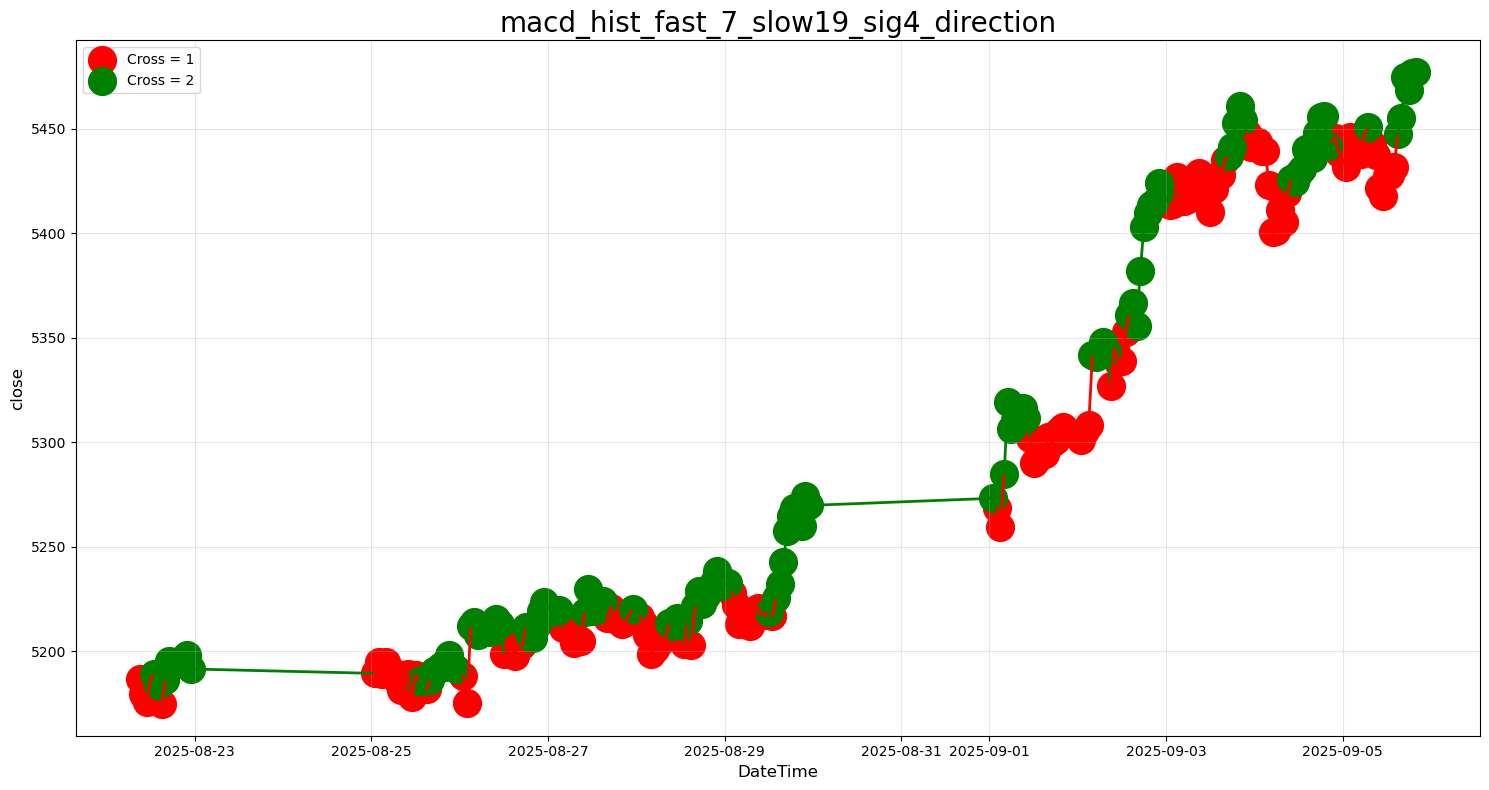

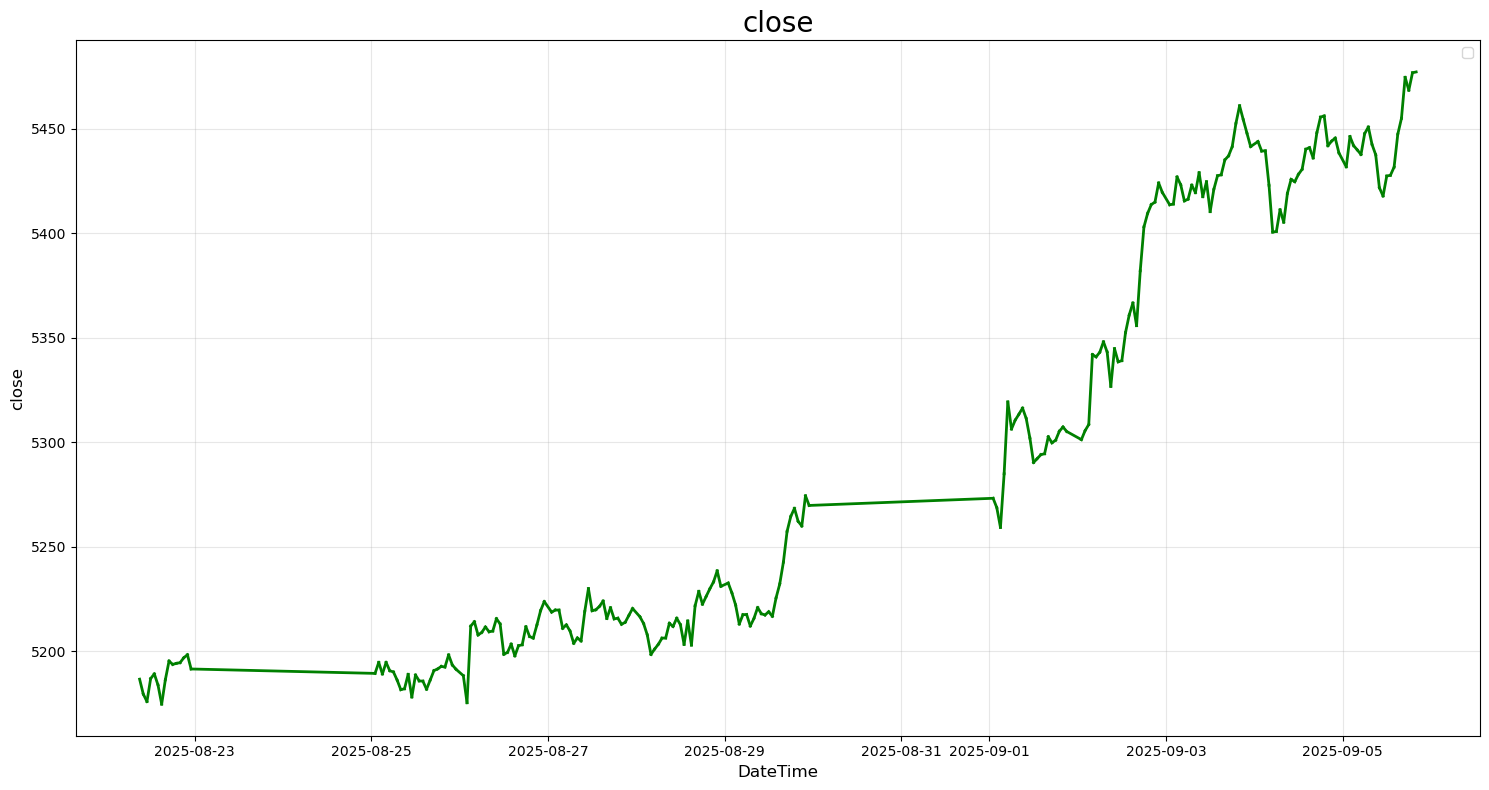

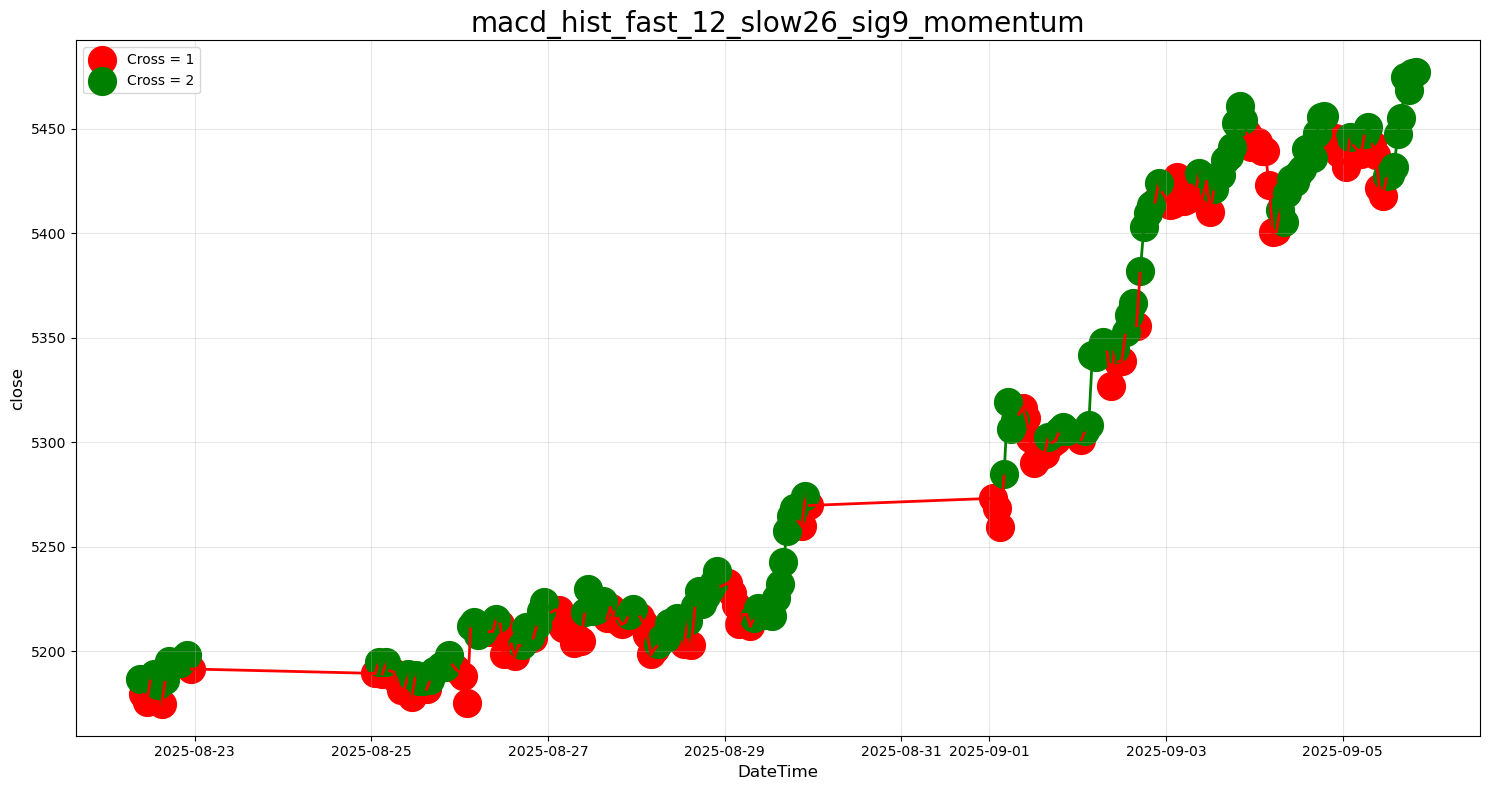

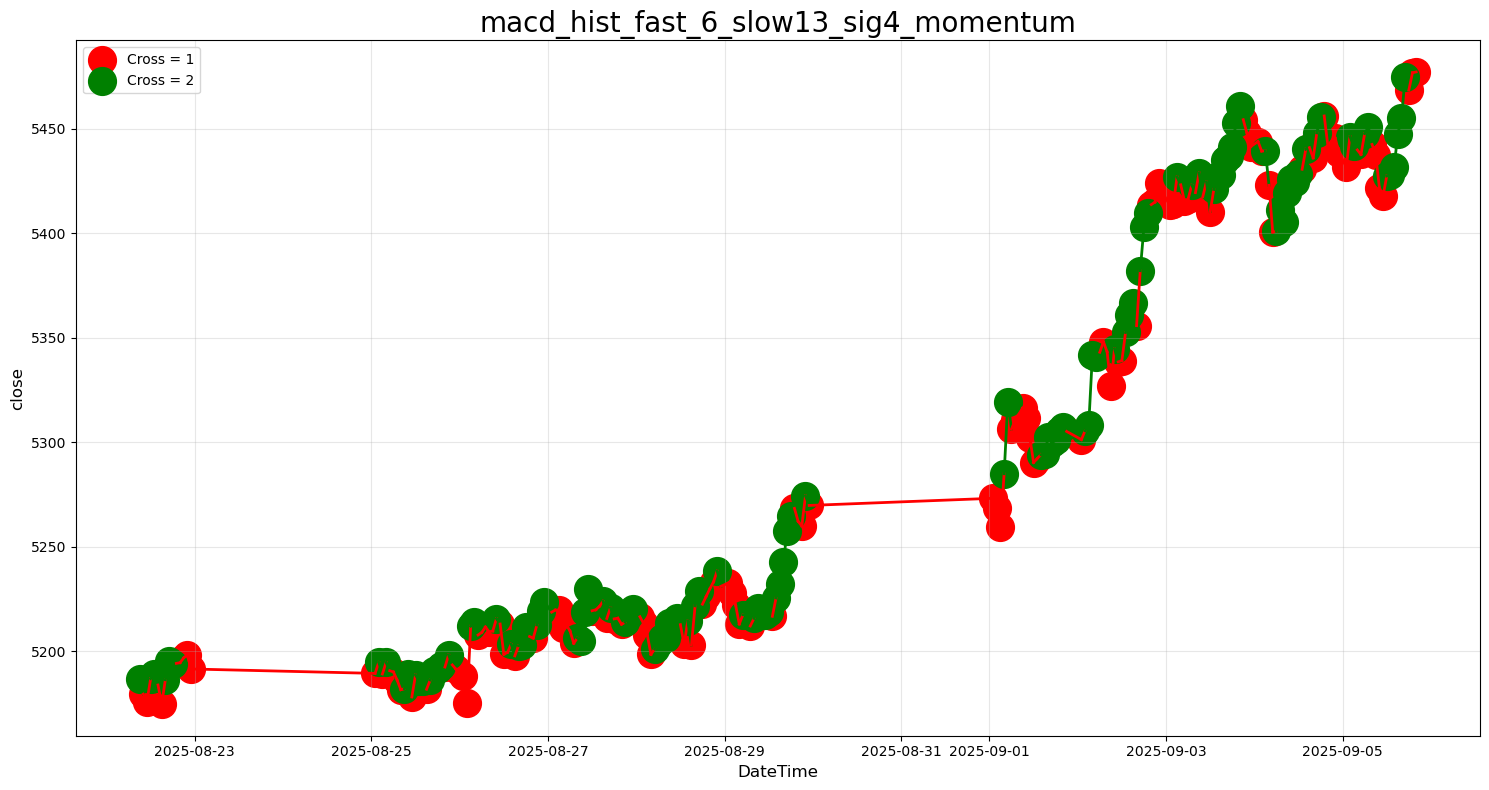

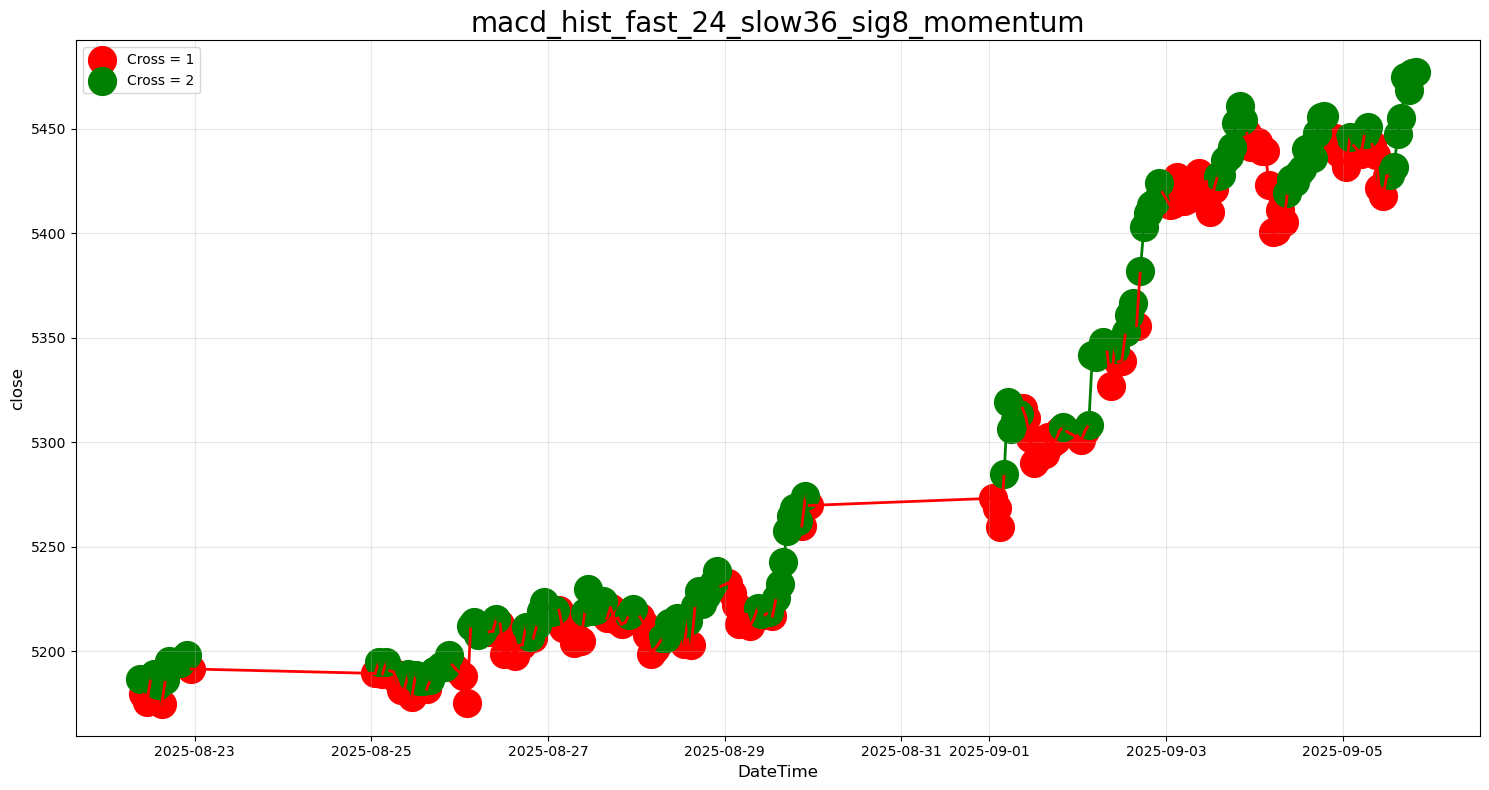

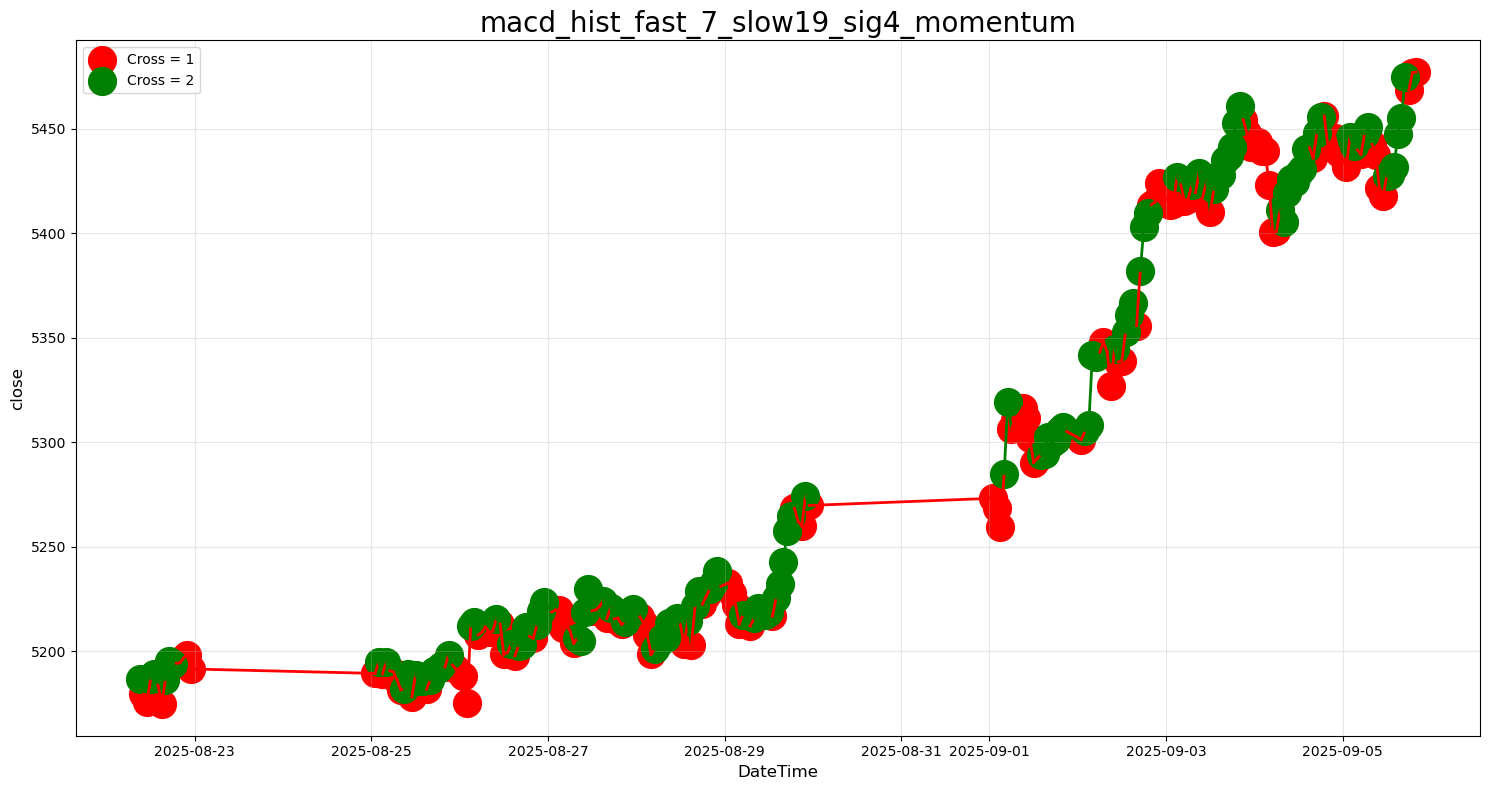

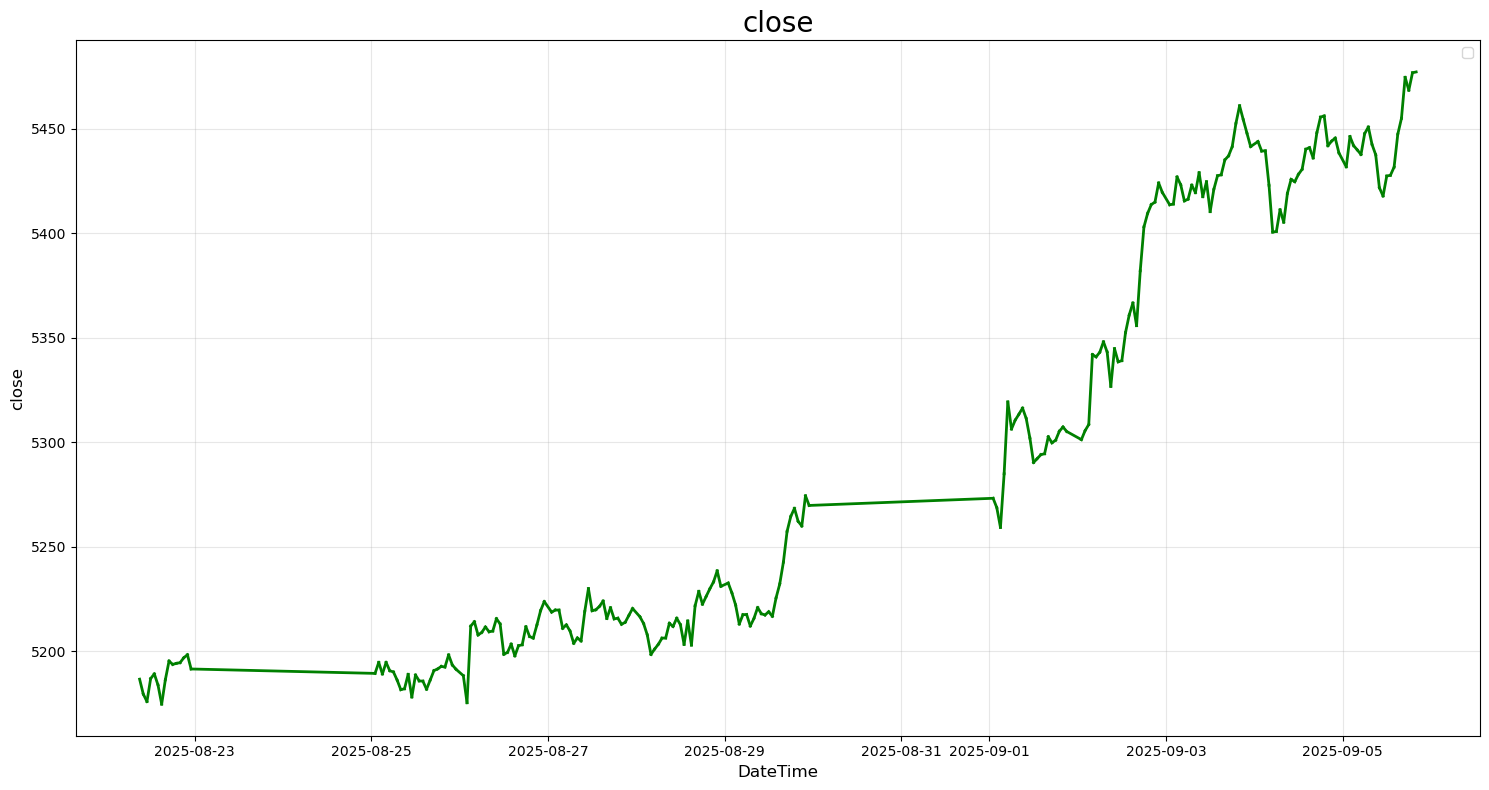

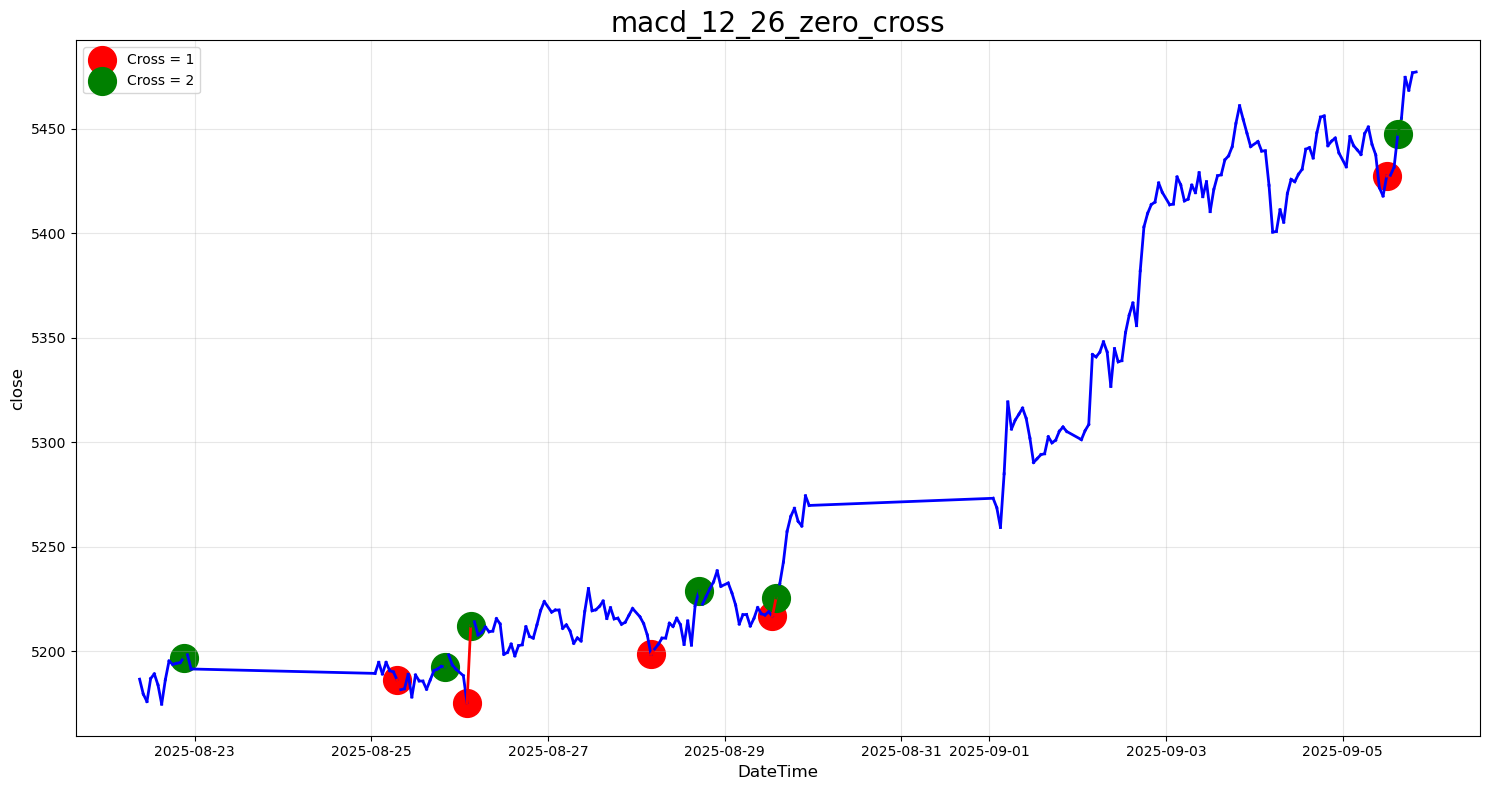

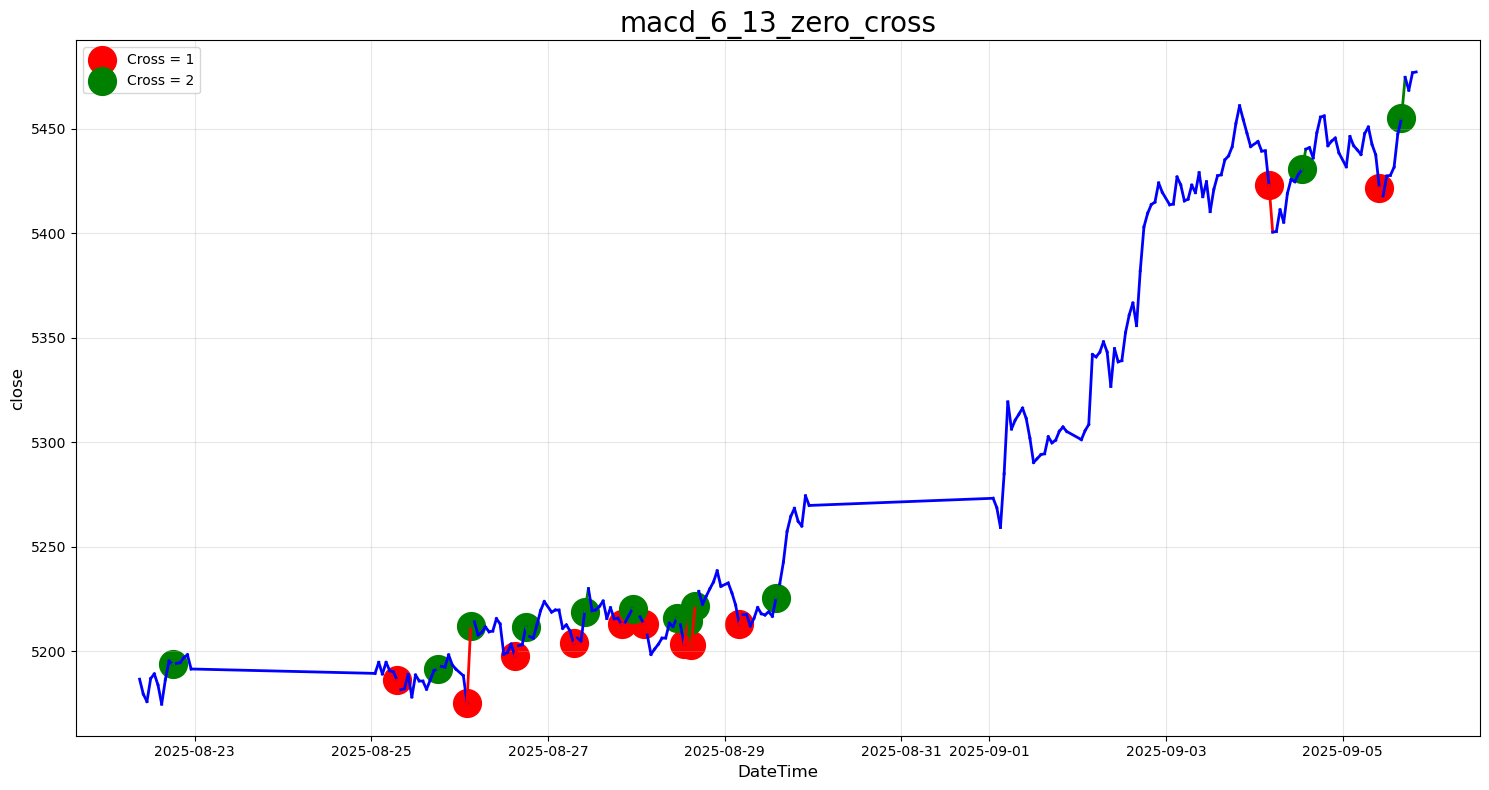

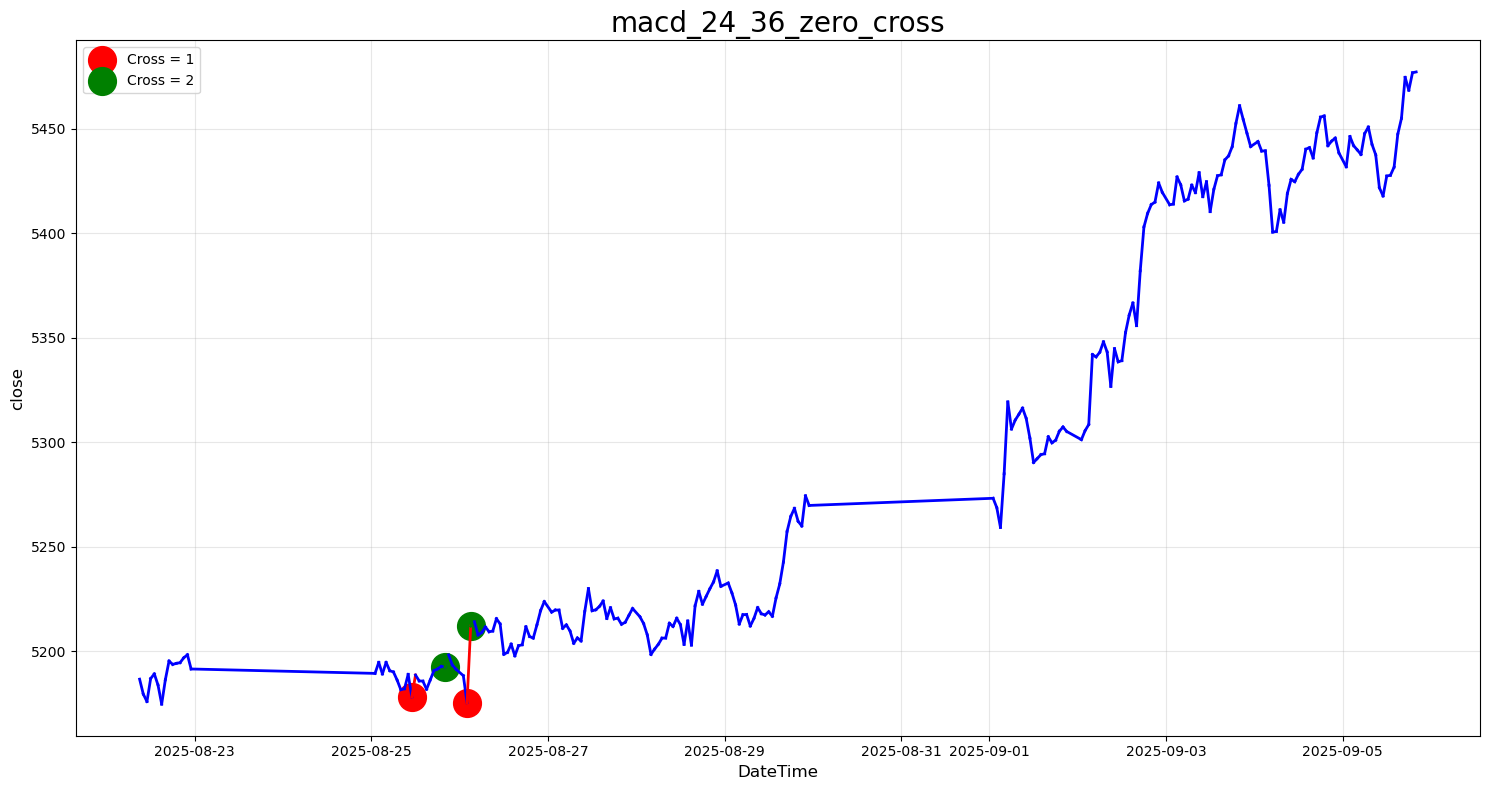

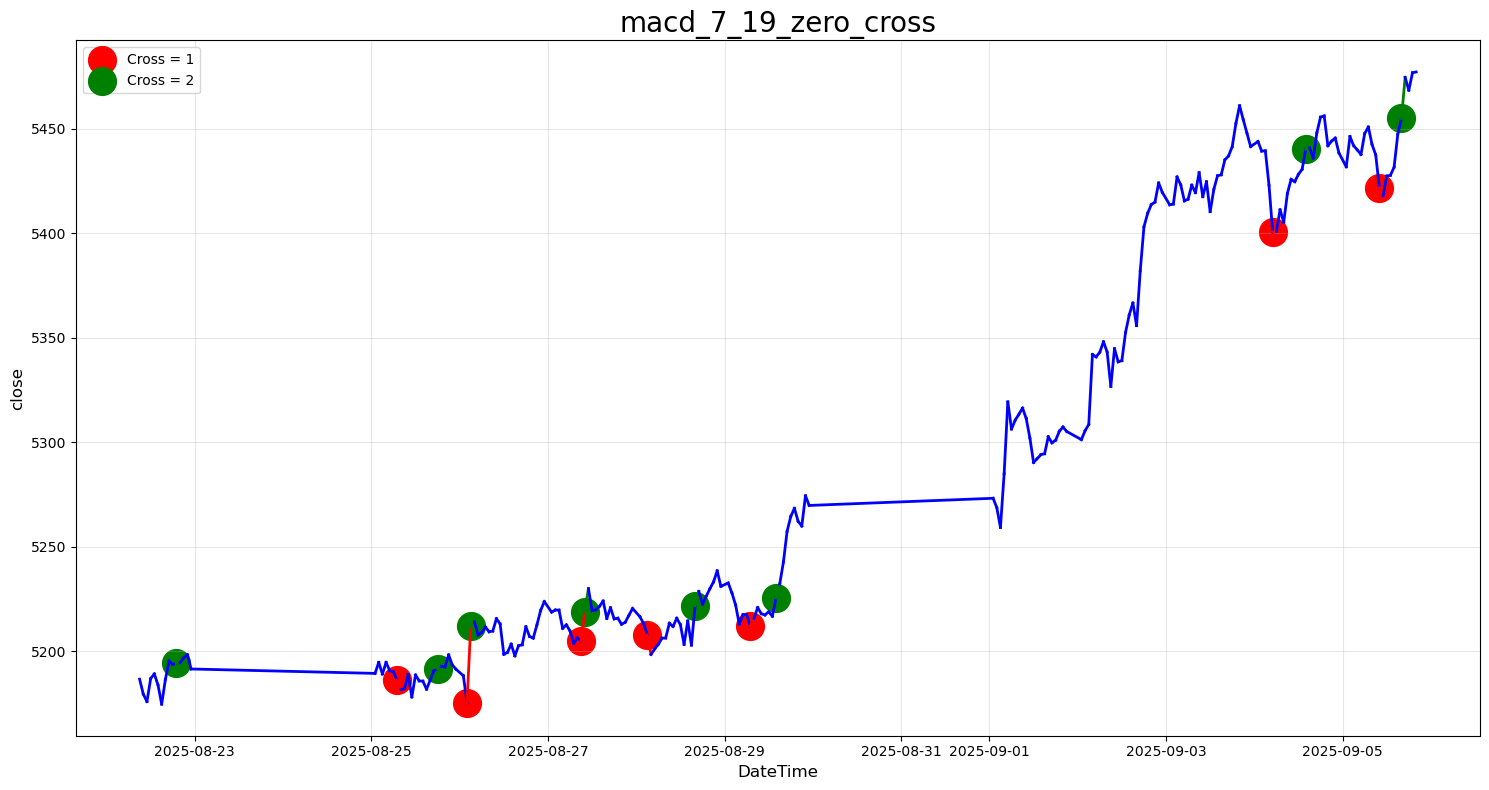

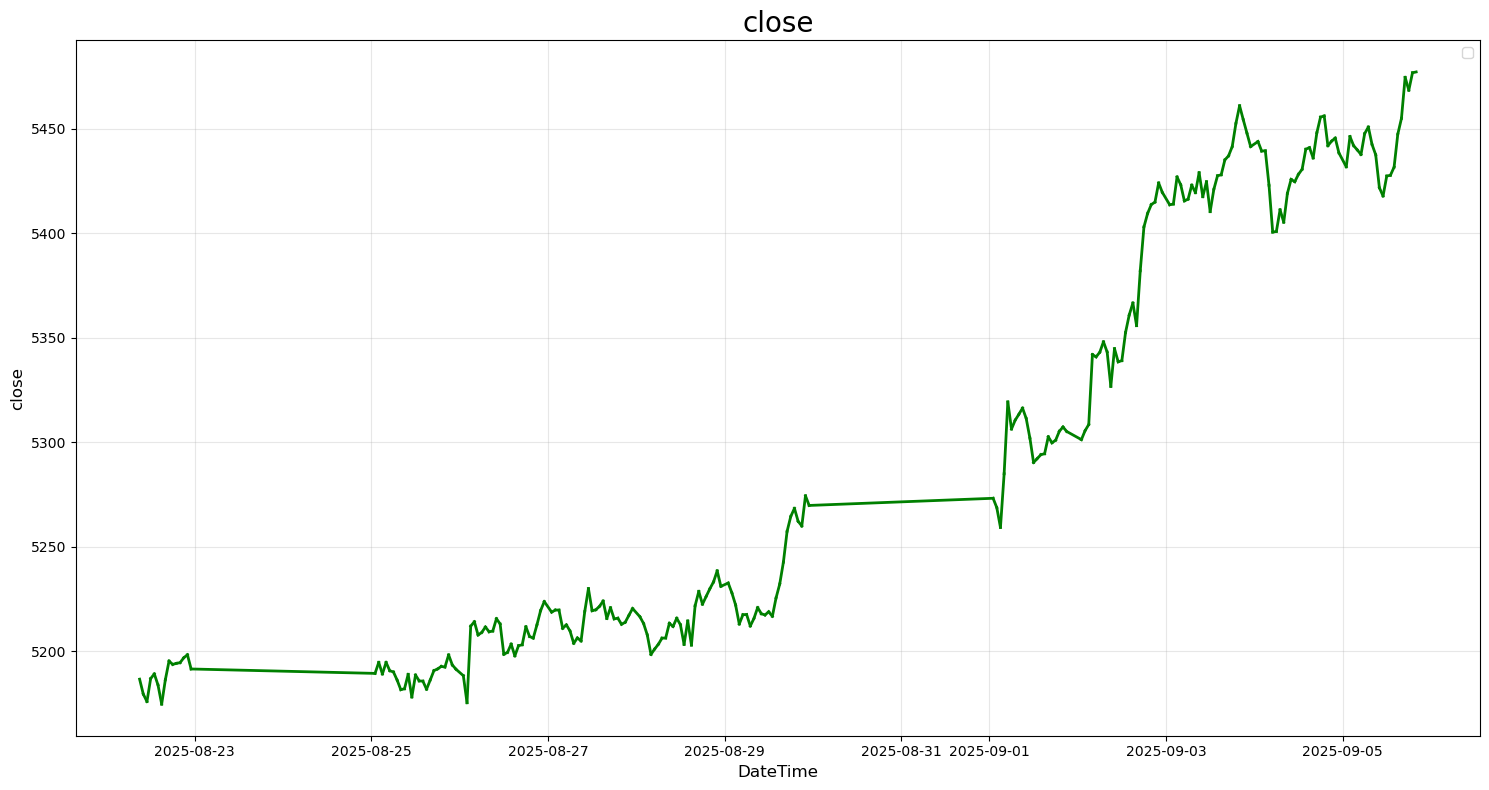

In [7]:
plotter = ForexPlotter(data = trend_signals_data)
for subcol in signal_cols:
    plotter.plot_signals(periods = 240, cols = subcol)

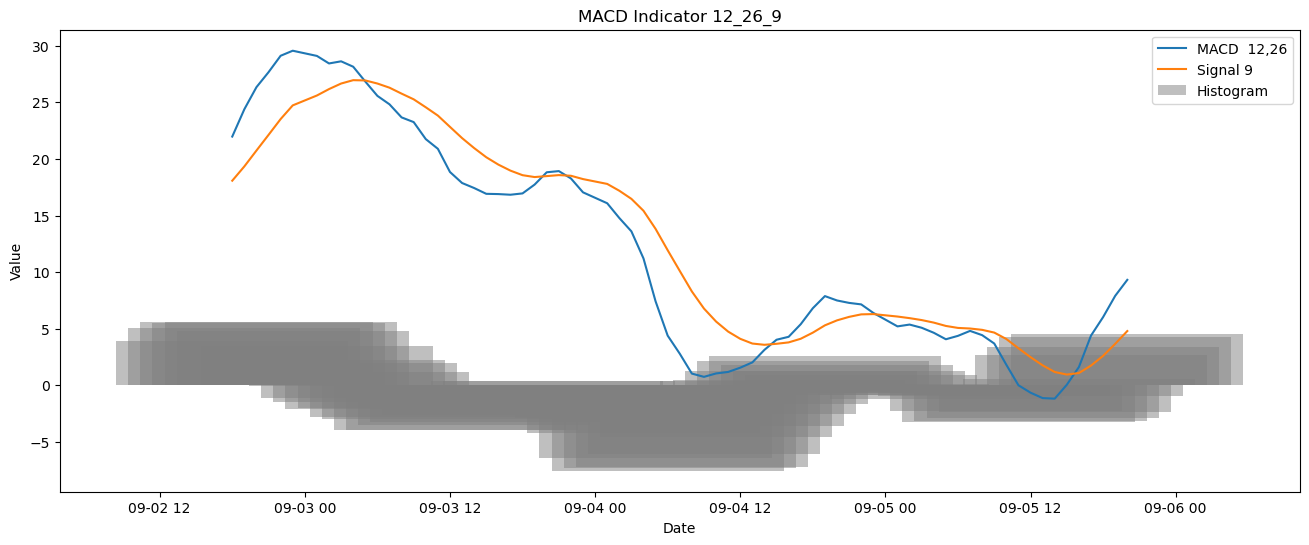

In [8]:
macd_line = trend_data[0]['macd_12_26'].tail(72)
macd_signal = trend_data[0]['macd_signal_9'].tail(72)
macd_hist = trend_data[0]['macd_hist_fast_12_slow26_sig9'].tail(72)

plt.figure(figsize=(16, 6))
plt.plot(macd_line.index, macd_line, label='MACD  12,26')
plt.plot(macd_signal.index, macd_signal, label='Signal 9')
plt.bar(macd_hist.index, macd_hist, label='Histogram', color='gray', alpha=0.5)
plt.legend()
plt.title('MACD Indicator 12_26_9')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()